In [50]:
import pm4py

src_log = pm4py.read_xes("5_parse_file.xes")

parsing log, completed traces ::   0%|          | 0/11 [00:00<?, ?it/s]

In [128]:
display(src_log["case:concept:name"].value_counts())
display(src_log["concept:name"].value_counts())

case:concept:name
3     325774
7     110484
1     103336
8     101918
6      94826
4      88990
9      85526
2      83990
5      81176
0      80662
10     74082
Name: count, dtype: int64

concept:name
End:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags                                53889
Start:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags                              53889
Start:GreenNode.get_RawKind                                                      41780
End:GreenNode.get_RawKind                                                        41780
Start:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode.get_Kind                     38946
                                                                                 ...  
End:CSharp.Syntax.InternalSyntax.ArrayCreationExpressionSyntax..ctor                 1
Start:CSharp.Syntax.InternalSyntax.ArrayCreationExpressionSyntax..ctor               1
Start:CSharp.Syntax.InternalSyntax.ContextAwareSyntax.ArrayCreationExpression        1
End:CSharp.Syntax.InternalSyntax.LanguageParser.ParseSwitchExpression                1
End:CSharp.Syntax.InternalSyntax.ContextAwareSyntax.IfStatement                      1
Name: count, Length: 1616, dty

In [54]:
import tqdm

src_log_list = []
for row in tqdm.tqdm(src_log.iterrows(), total = len(src_log)):
    src_log_list.append(row[1].to_dict())
len(src_log_list)

100%|██████████| 1230764/1230764 [00:52<00:00, 23321.65it/s]


1230764

In [129]:
import pandas

from utils.merge_paired_events import merge_paired_events
from utils.find_first_deviation import find_first_deviation
from utils.remove_call_contents import remove_call_contents
from utils.extract_call_contents import extract_call_contents
from utils.remove_package import remove_package

In [130]:
log_list = remove_package(src_log_list, "Collections")
log_list = remove_package(log_list, "CollectionsExtensions")
log_list = remove_package(log_list, "PooledObjects")
log_list = remove_package(log_list, "ImmutableArrayExtensions")
log_list = remove_package(log_list, "CSharp.Syntax.InternalSyntax.SlidingTextWindow")
log_list = remove_package(log_list, "CSharp.Syntax.InternalSyntax.AbstractLexer")
len(log_list)

1/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow..ctor


100%|██████████| 1230764/1230764 [00:00<00:00, 4083810.92it/s]


2/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow..cctor


100%|██████████| 1230654/1230654 [00:00<00:00, 3860070.90it/s]


3/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.get_Text


100%|██████████| 1230654/1230654 [00:00<00:00, 3828670.50it/s]


4/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.Start


100%|██████████| 1230566/1230566 [00:00<00:00, 3817977.98it/s]


5/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.get_Offset


100%|██████████| 1221184/1221184 [00:00<00:00, 3867512.05it/s]


6/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.get_CharacterWindowCount


100%|██████████| 1212978/1212978 [00:00<00:00, 3819730.58it/s]


7/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.get_CharacterWindow


100%|██████████| 1208378/1208378 [00:00<00:00, 3868491.91it/s]


8/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.AdvanceChar


100%|██████████| 1200058/1200058 [00:00<00:00, 3979343.62it/s]


9/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.get_LexemeStartPosition


100%|██████████| 1190606/1190606 [00:00<00:00, 3866845.00it/s]


10/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.Reset


100%|██████████| 1188832/1188832 [00:00<00:00, 3973912.87it/s]


11/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.get_Position


100%|██████████| 1187140/1187140 [00:00<00:00, 3911798.07it/s]


12/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.PeekChar


100%|██████████| 1183610/1183610 [00:00<00:00, 3942741.50it/s]


13/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.MoreChars


100%|██████████| 1171700/1171700 [00:00<00:00, 3865713.41it/s]


14/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.Intern


100%|██████████| 1171700/1171700 [00:00<00:00, 3780573.66it/s]


15/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.get_Width


100%|██████████| 1170422/1170422 [00:00<00:00, 3847409.25it/s]


16/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.get_LexemeRelativeStart


100%|██████████| 1169012/1169012 [00:00<00:00, 3930222.02it/s]


17/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.TryAdvance


100%|██████████| 1161898/1161898 [00:00<00:00, 3793851.05it/s]


18/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.GetText


100%|██████████| 1161350/1161350 [00:00<00:00, 3956180.34it/s]


19/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.IsReallyAtEnd


100%|██████████| 1160970/1160970 [00:00<00:00, 3834773.92it/s]


20/20: Start:CSharp.Syntax.InternalSyntax.SlidingTextWindow.Dispose


100%|██████████| 1160948/1160948 [00:00<00:00, 3786483.72it/s]


1/5: Start:CSharp.Syntax.InternalSyntax.AbstractLexer..ctor


100%|██████████| 1160926/1160926 [00:00<00:00, 3867488.70it/s]


2/5: Start:CSharp.Syntax.InternalSyntax.AbstractLexer.Start


100%|██████████| 1160904/1160904 [00:00<00:00, 3849547.06it/s]


3/5: Start:CSharp.Syntax.InternalSyntax.AbstractLexer.GetErrors


100%|██████████| 1151522/1151522 [00:00<00:00, 3812697.22it/s]


4/5: Start:CSharp.Syntax.InternalSyntax.AbstractLexer.get_HasErrors


100%|██████████| 1149938/1149938 [00:00<00:00, 3773612.16it/s]


5/5: Start:CSharp.Syntax.InternalSyntax.AbstractLexer.Dispose


100%|██████████| 1148682/1148682 [00:00<00:00, 3898849.59it/s]


1148660

In [132]:
import typing

def display_process(log_list: typing.List[dict], event_to_remove: str, save_log_to: typing.Optional[str] = None, do_draw: bool = True):
    log_extracted = pandas.DataFrame(extract_call_contents(log_list, event_to_remove))
    if save_log_to:
        pm4py.write_xes(log_extracted, save_log_to)
    display(log_extracted.shape)
    display(log_extracted["case:concept:name"].value_counts())
    display(log_extracted["concept:name"].value_counts())
    
    if do_draw:
        log_extracted_merged = merge_paired_events(log_extracted)
        heuristics_net = pm4py.discover_heuristics_net(log_extracted_merged)
        return pm4py.view_heuristics_net(heuristics_net)

### LexSyntaxTrivia

100%|██████████| 1148660/1148660 [00:00<00:00, 3938844.56it/s]


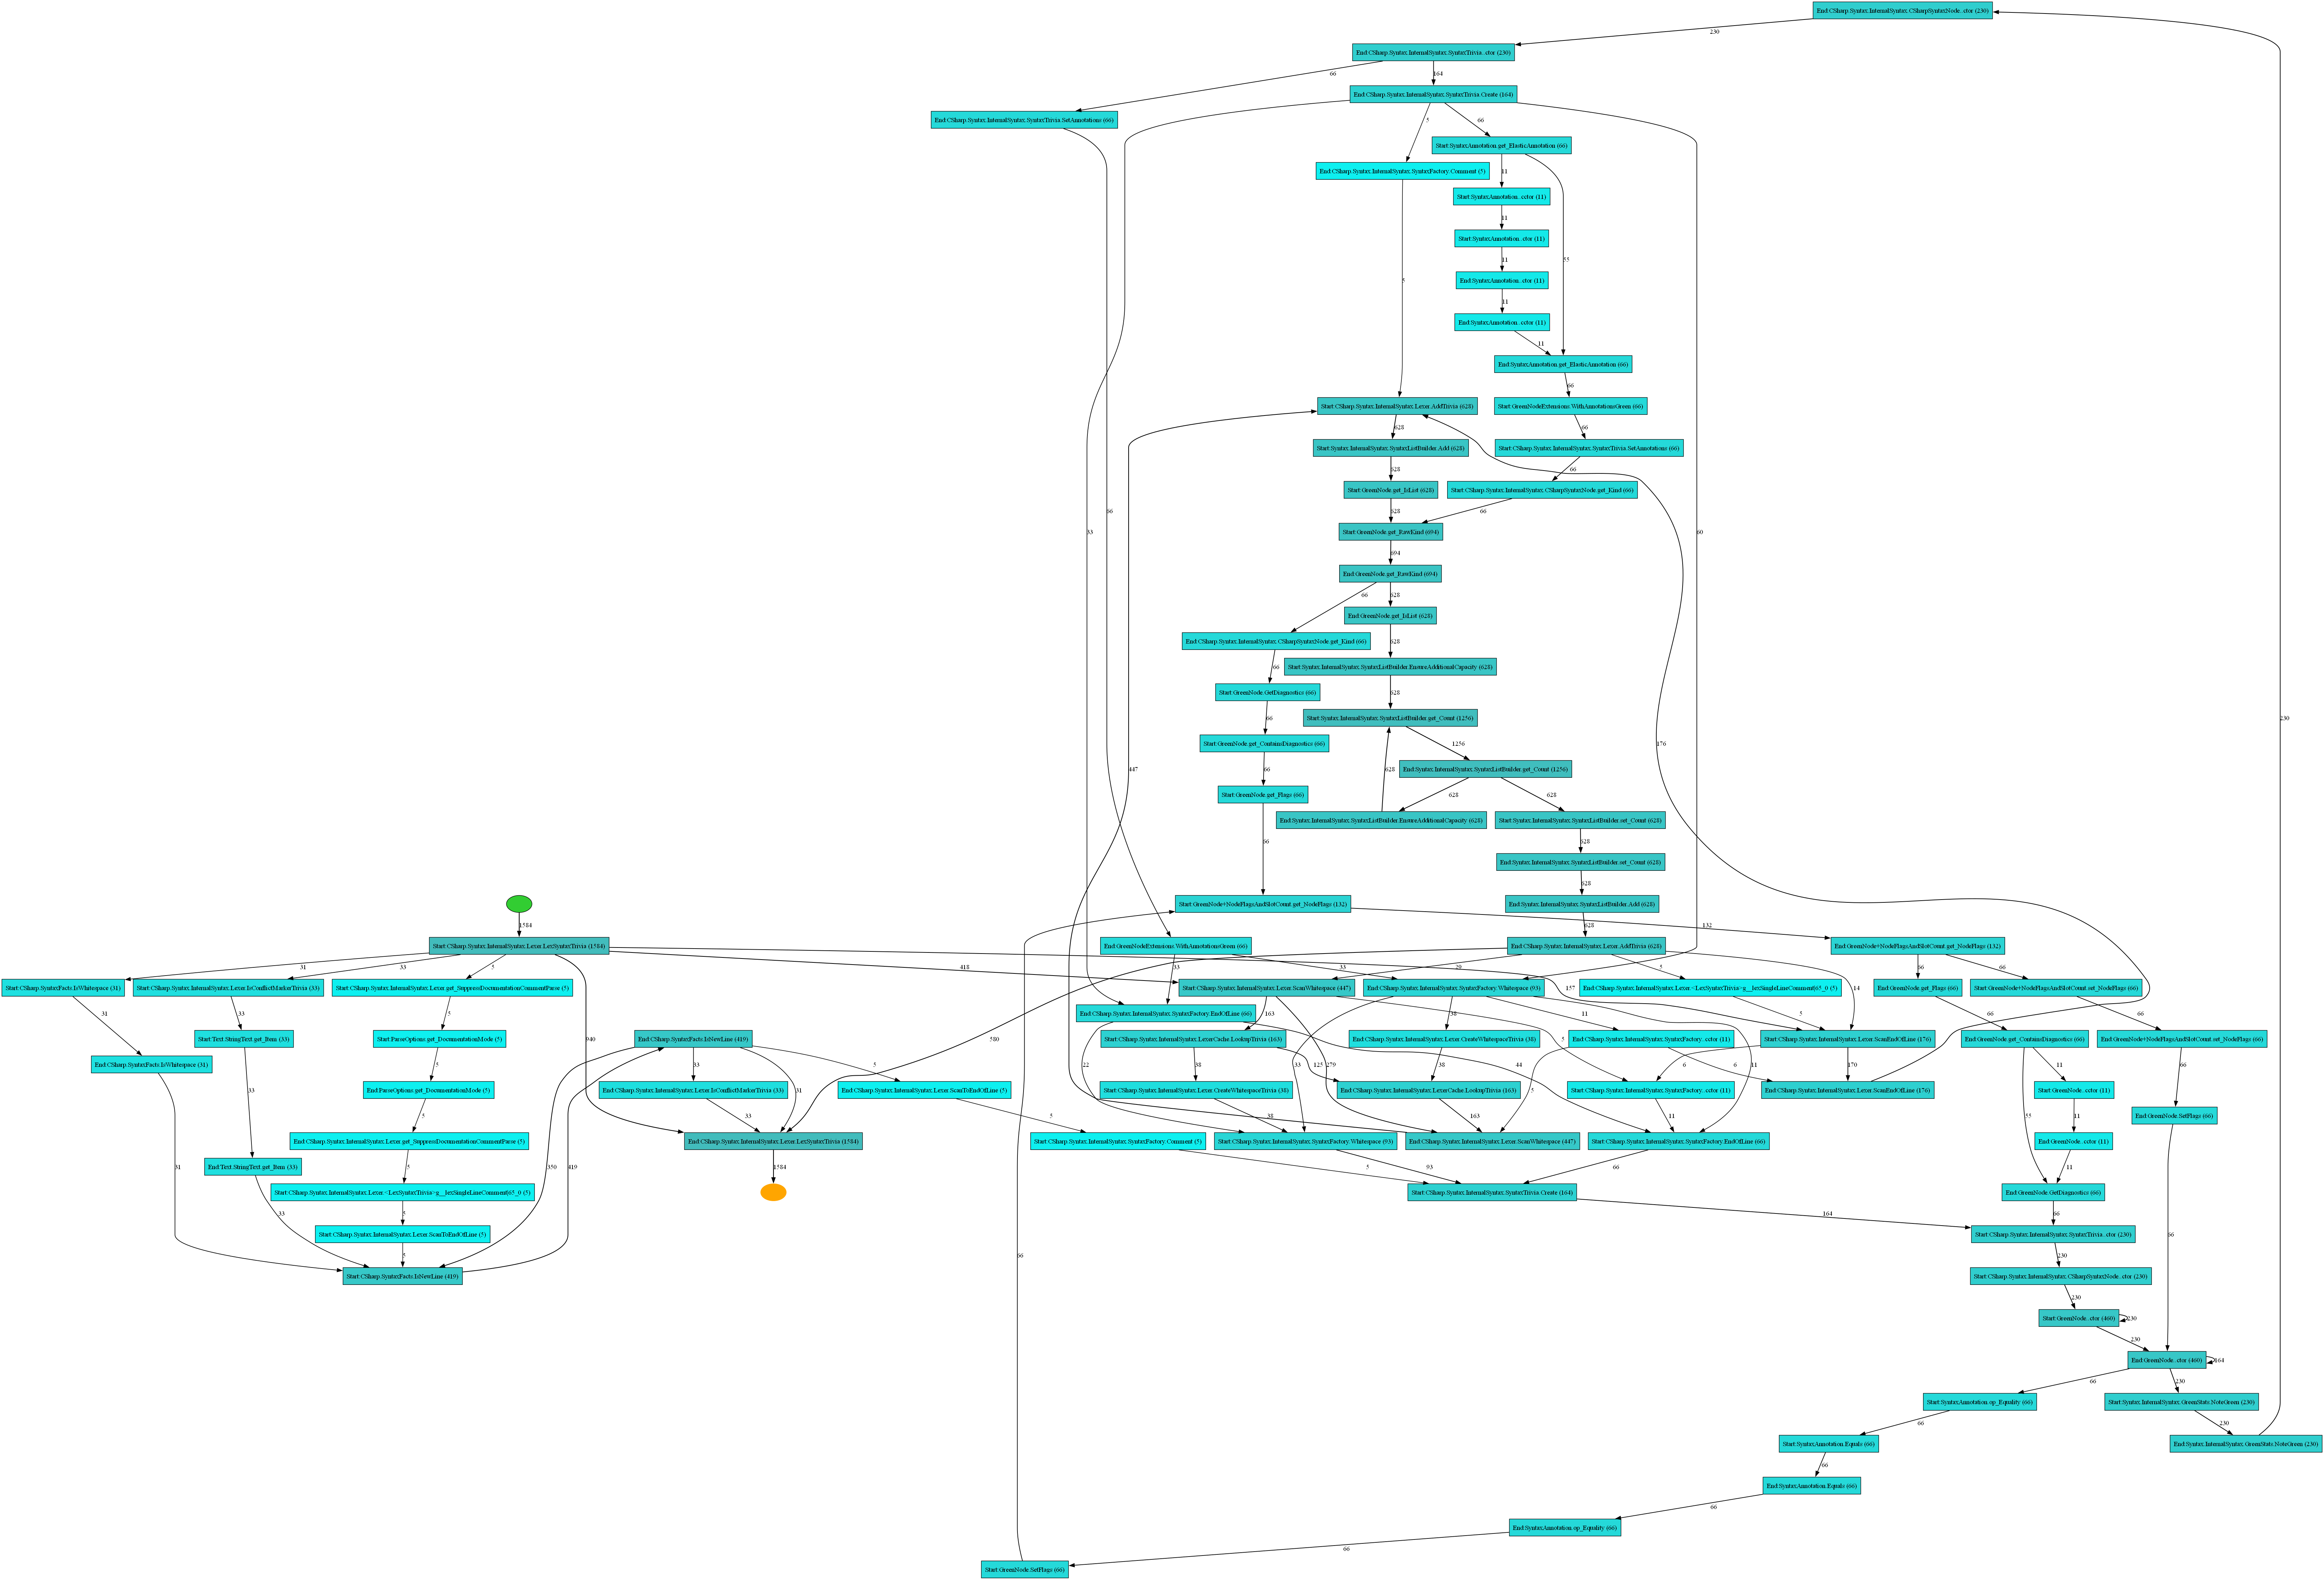

In [133]:
lex_syntax_trivia = extract_call_contents(log_list, 'CSharp.Syntax.InternalSyntax.Lexer.LexSyntaxTrivia')
pm4py.view_heuristics_net(pm4py.discover_heuristics_net(pandas.DataFrame(lex_syntax_trivia)))

In [134]:
lex_syntax_trivia_log = pandas.DataFrame(lex_syntax_trivia)
lex_syntax_trivia_log[lex_syntax_trivia_log["concept:name"].str.contains("Lexer.ScanEndOfLine")]["original:concept:name"].value_counts()

original:concept:name
3     46
2     44
7     40
8     38
5     34
9     28
0     26
6     26
10    26
1     24
4     20
Name: count, dtype: int64

100%|██████████| 20828/20828 [00:00<00:00, 3198790.32it/s]


18312


100%|██████████| 20828/20828 [00:00<00:00, 3200900.03it/s]


(2692, 9)

case:concept:name
47     392
25     392
110    392
70     392
149    392
      ... 
61       2
62       2
63       2
64       2
175      2
Name: count, Length: 176, dtype: int64

concept:name
Start:GreenNode..ctor                                             204
End:GreenNode..ctor                                               204
Start:CSharp.Syntax.InternalSyntax.Lexer.ScanEndOfLine            176
End:CSharp.Syntax.InternalSyntax.Lexer.ScanEndOfLine              176
End:CSharp.Syntax.InternalSyntax.SyntaxTrivia..ctor               102
End:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode..ctor           102
End:Syntax.InternalSyntax.GreenStats.NoteGreen                    102
Start:Syntax.InternalSyntax.GreenStats.NoteGreen                  102
Start:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode..ctor         102
Start:CSharp.Syntax.InternalSyntax.SyntaxTrivia..ctor             102
End:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags                  72
Start:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags                72
Start:CSharp.Syntax.InternalSyntax.SyntaxTrivia.Create             66
End:CSharp.Syntax.InternalSyntax.SyntaxTrivia.Create               66
Start:S

100%|█████████▉| 1574/1576 [00:00<00:00, 174471.70it/s]


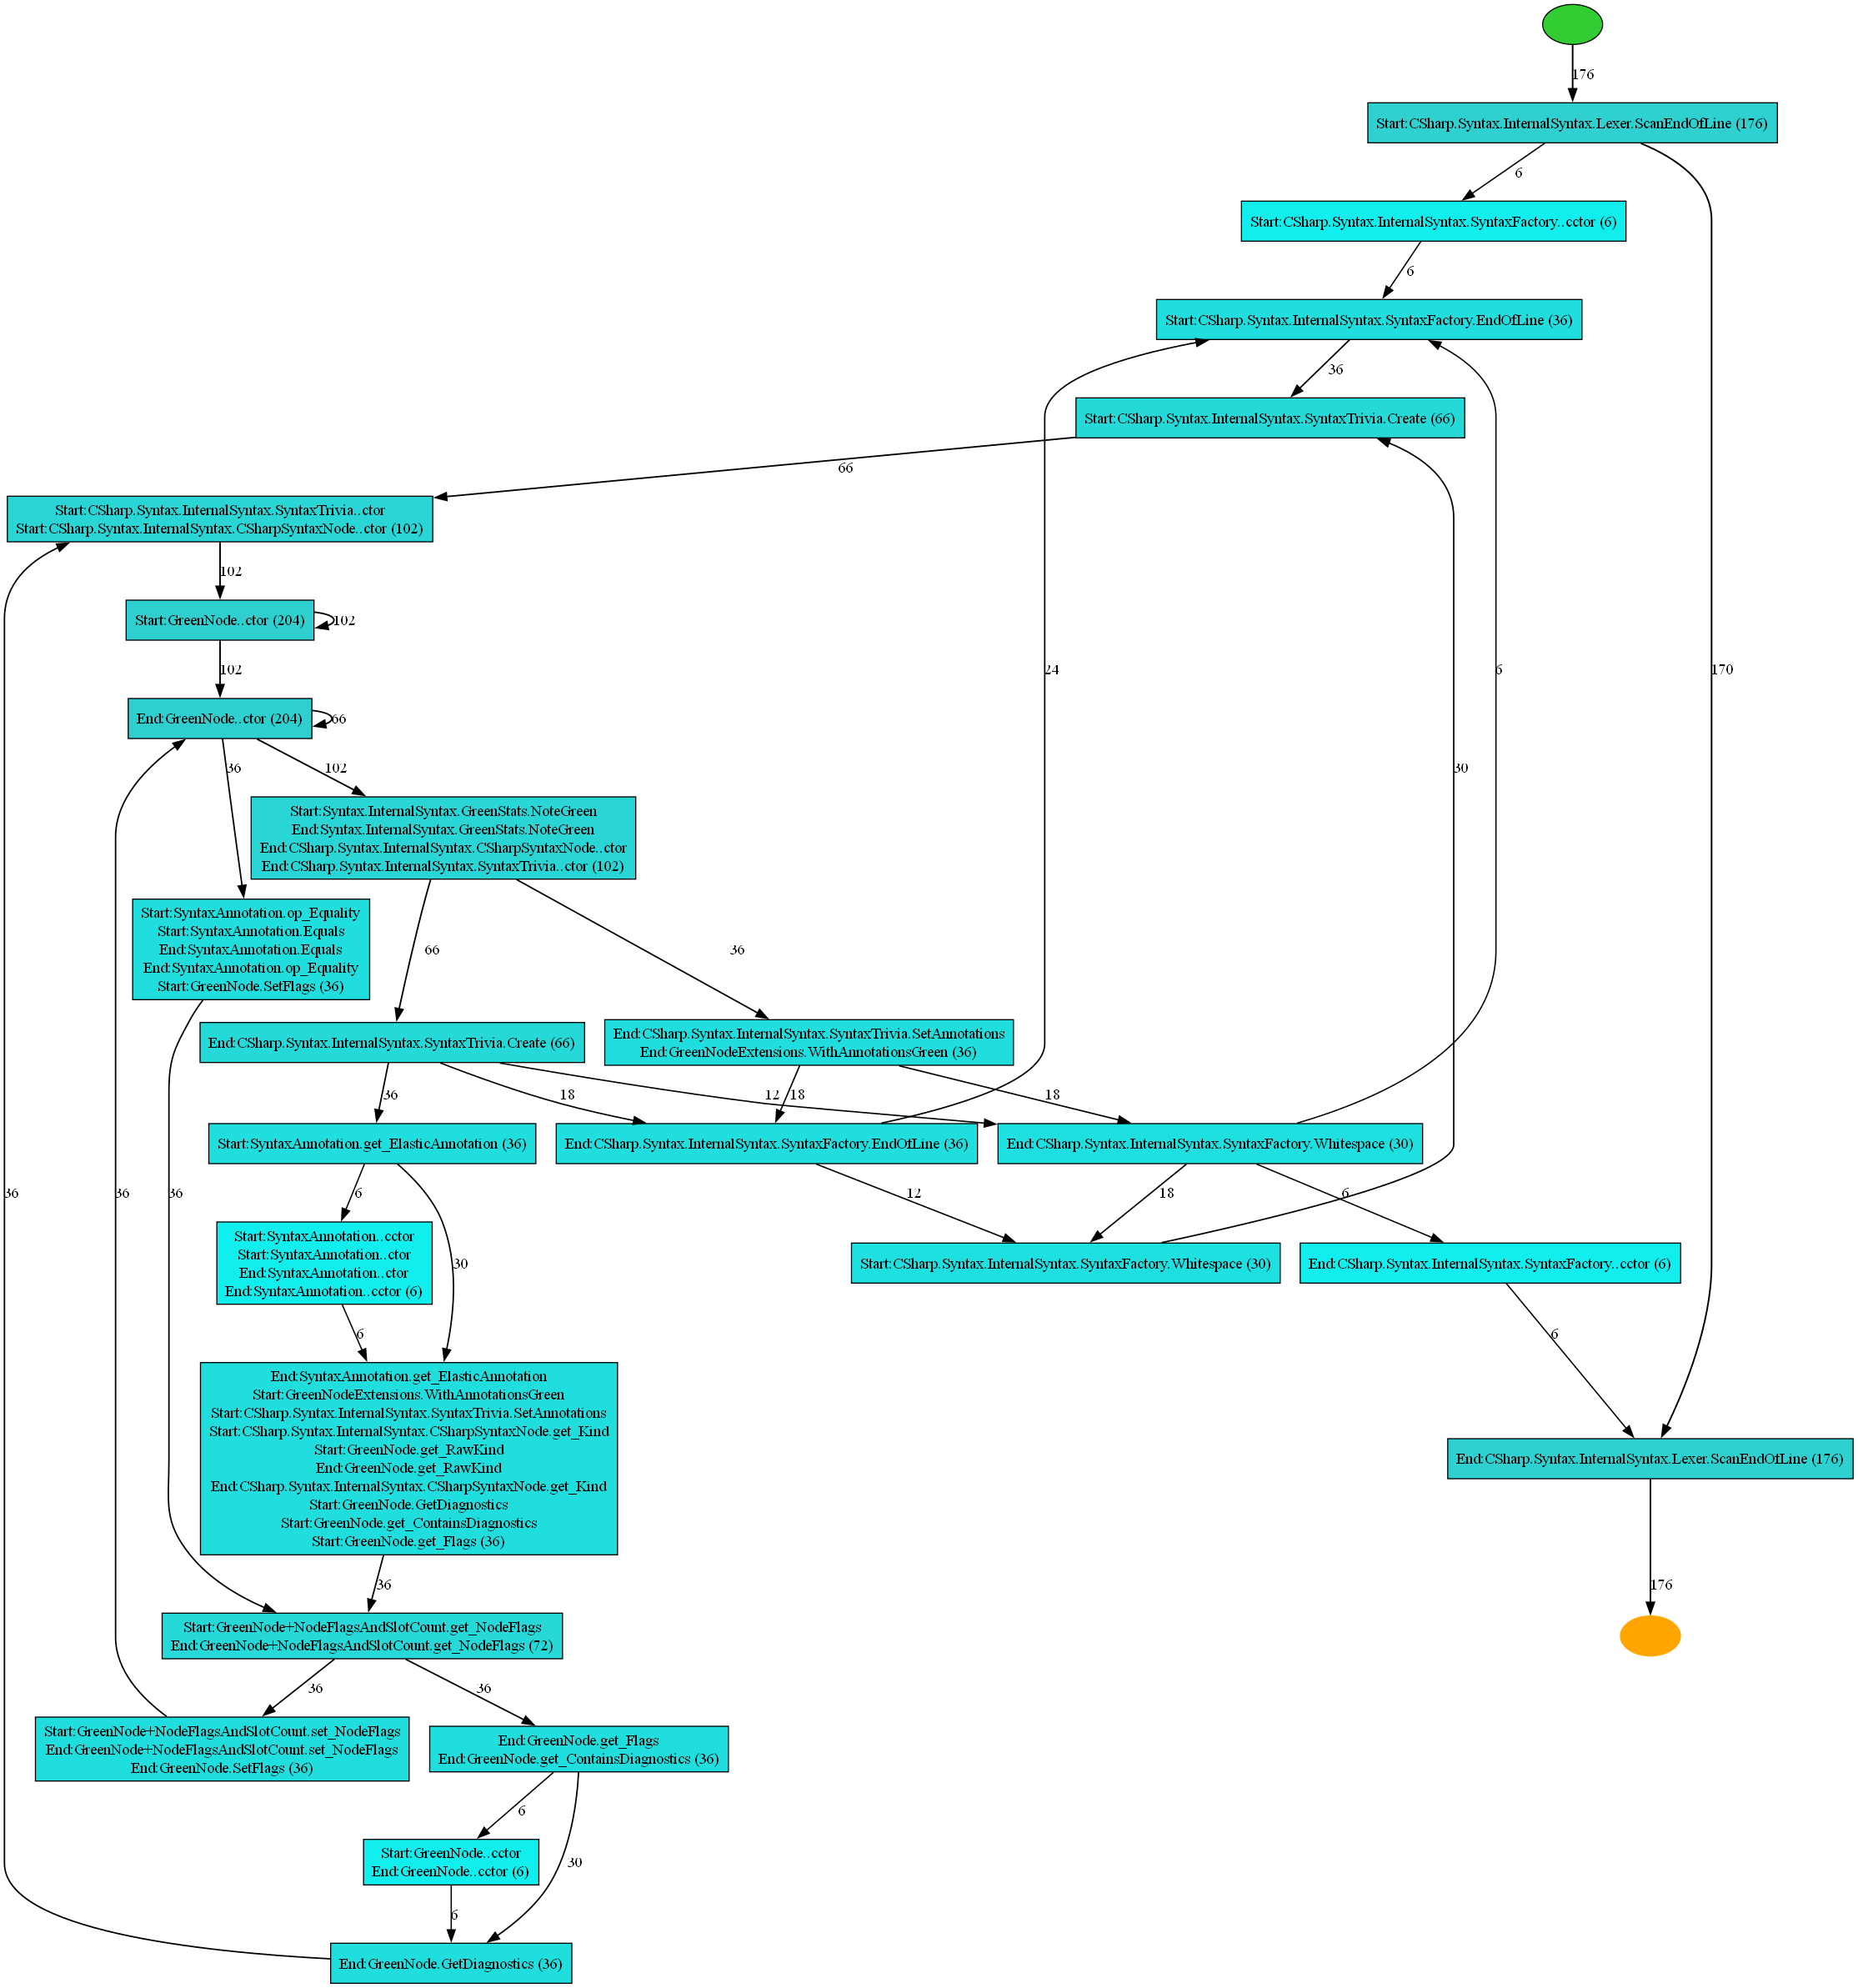

In [135]:
to_remove = 'CSharp.Syntax.InternalSyntax.Lexer.ScanEndOfLine'
lex_syntax_trivia_1 = remove_call_contents(lex_syntax_trivia, to_remove)
print(len(lex_syntax_trivia_1))
display_process(lex_syntax_trivia, to_remove)

In [136]:
lex_syntax_trivia_log = pandas.DataFrame(lex_syntax_trivia)
lex_syntax_trivia_log[lex_syntax_trivia_log["concept:name"].str.contains("Lexer.ScanWhitespace")]["original:concept:name"].value_counts()

original:concept:name
3     140
7     124
2      92
8      90
1      80
5      80
6      72
0      60
9      60
10     56
4      40
Name: count, dtype: int64

100%|██████████| 18312/18312 [00:00<00:00, 2811453.38it/s]


14981


100%|██████████| 18312/18312 [00:00<00:00, 2437592.27it/s]


(3778, 9)

case:concept:name
0      392
30     392
206    392
344    392
246    392
      ... 
244      2
243      2
242      2
241      2
223      2
Name: count, Length: 447, dtype: int64

concept:name
Start:CSharp.Syntax.InternalSyntax.Lexer.ScanWhitespace            447
End:CSharp.Syntax.InternalSyntax.Lexer.ScanWhitespace              447
Start:GreenNode..ctor                                              246
End:GreenNode..ctor                                                246
Start:CSharp.Syntax.InternalSyntax.LexerCache.LookupTrivia         163
End:CSharp.Syntax.InternalSyntax.LexerCache.LookupTrivia           163
Start:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode..ctor          123
Start:Syntax.InternalSyntax.GreenStats.NoteGreen                   123
End:Syntax.InternalSyntax.GreenStats.NoteGreen                     123
End:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode..ctor            123
End:CSharp.Syntax.InternalSyntax.SyntaxTrivia..ctor                123
Start:CSharp.Syntax.InternalSyntax.SyntaxTrivia..ctor              123
Start:CSharp.Syntax.InternalSyntax.SyntaxTrivia.Create              93
End:CSharp.Syntax.InternalSyntax.SyntaxTrivia.Create            

100%|█████████▉| 2694/2696 [00:00<00:00, 239949.35it/s]


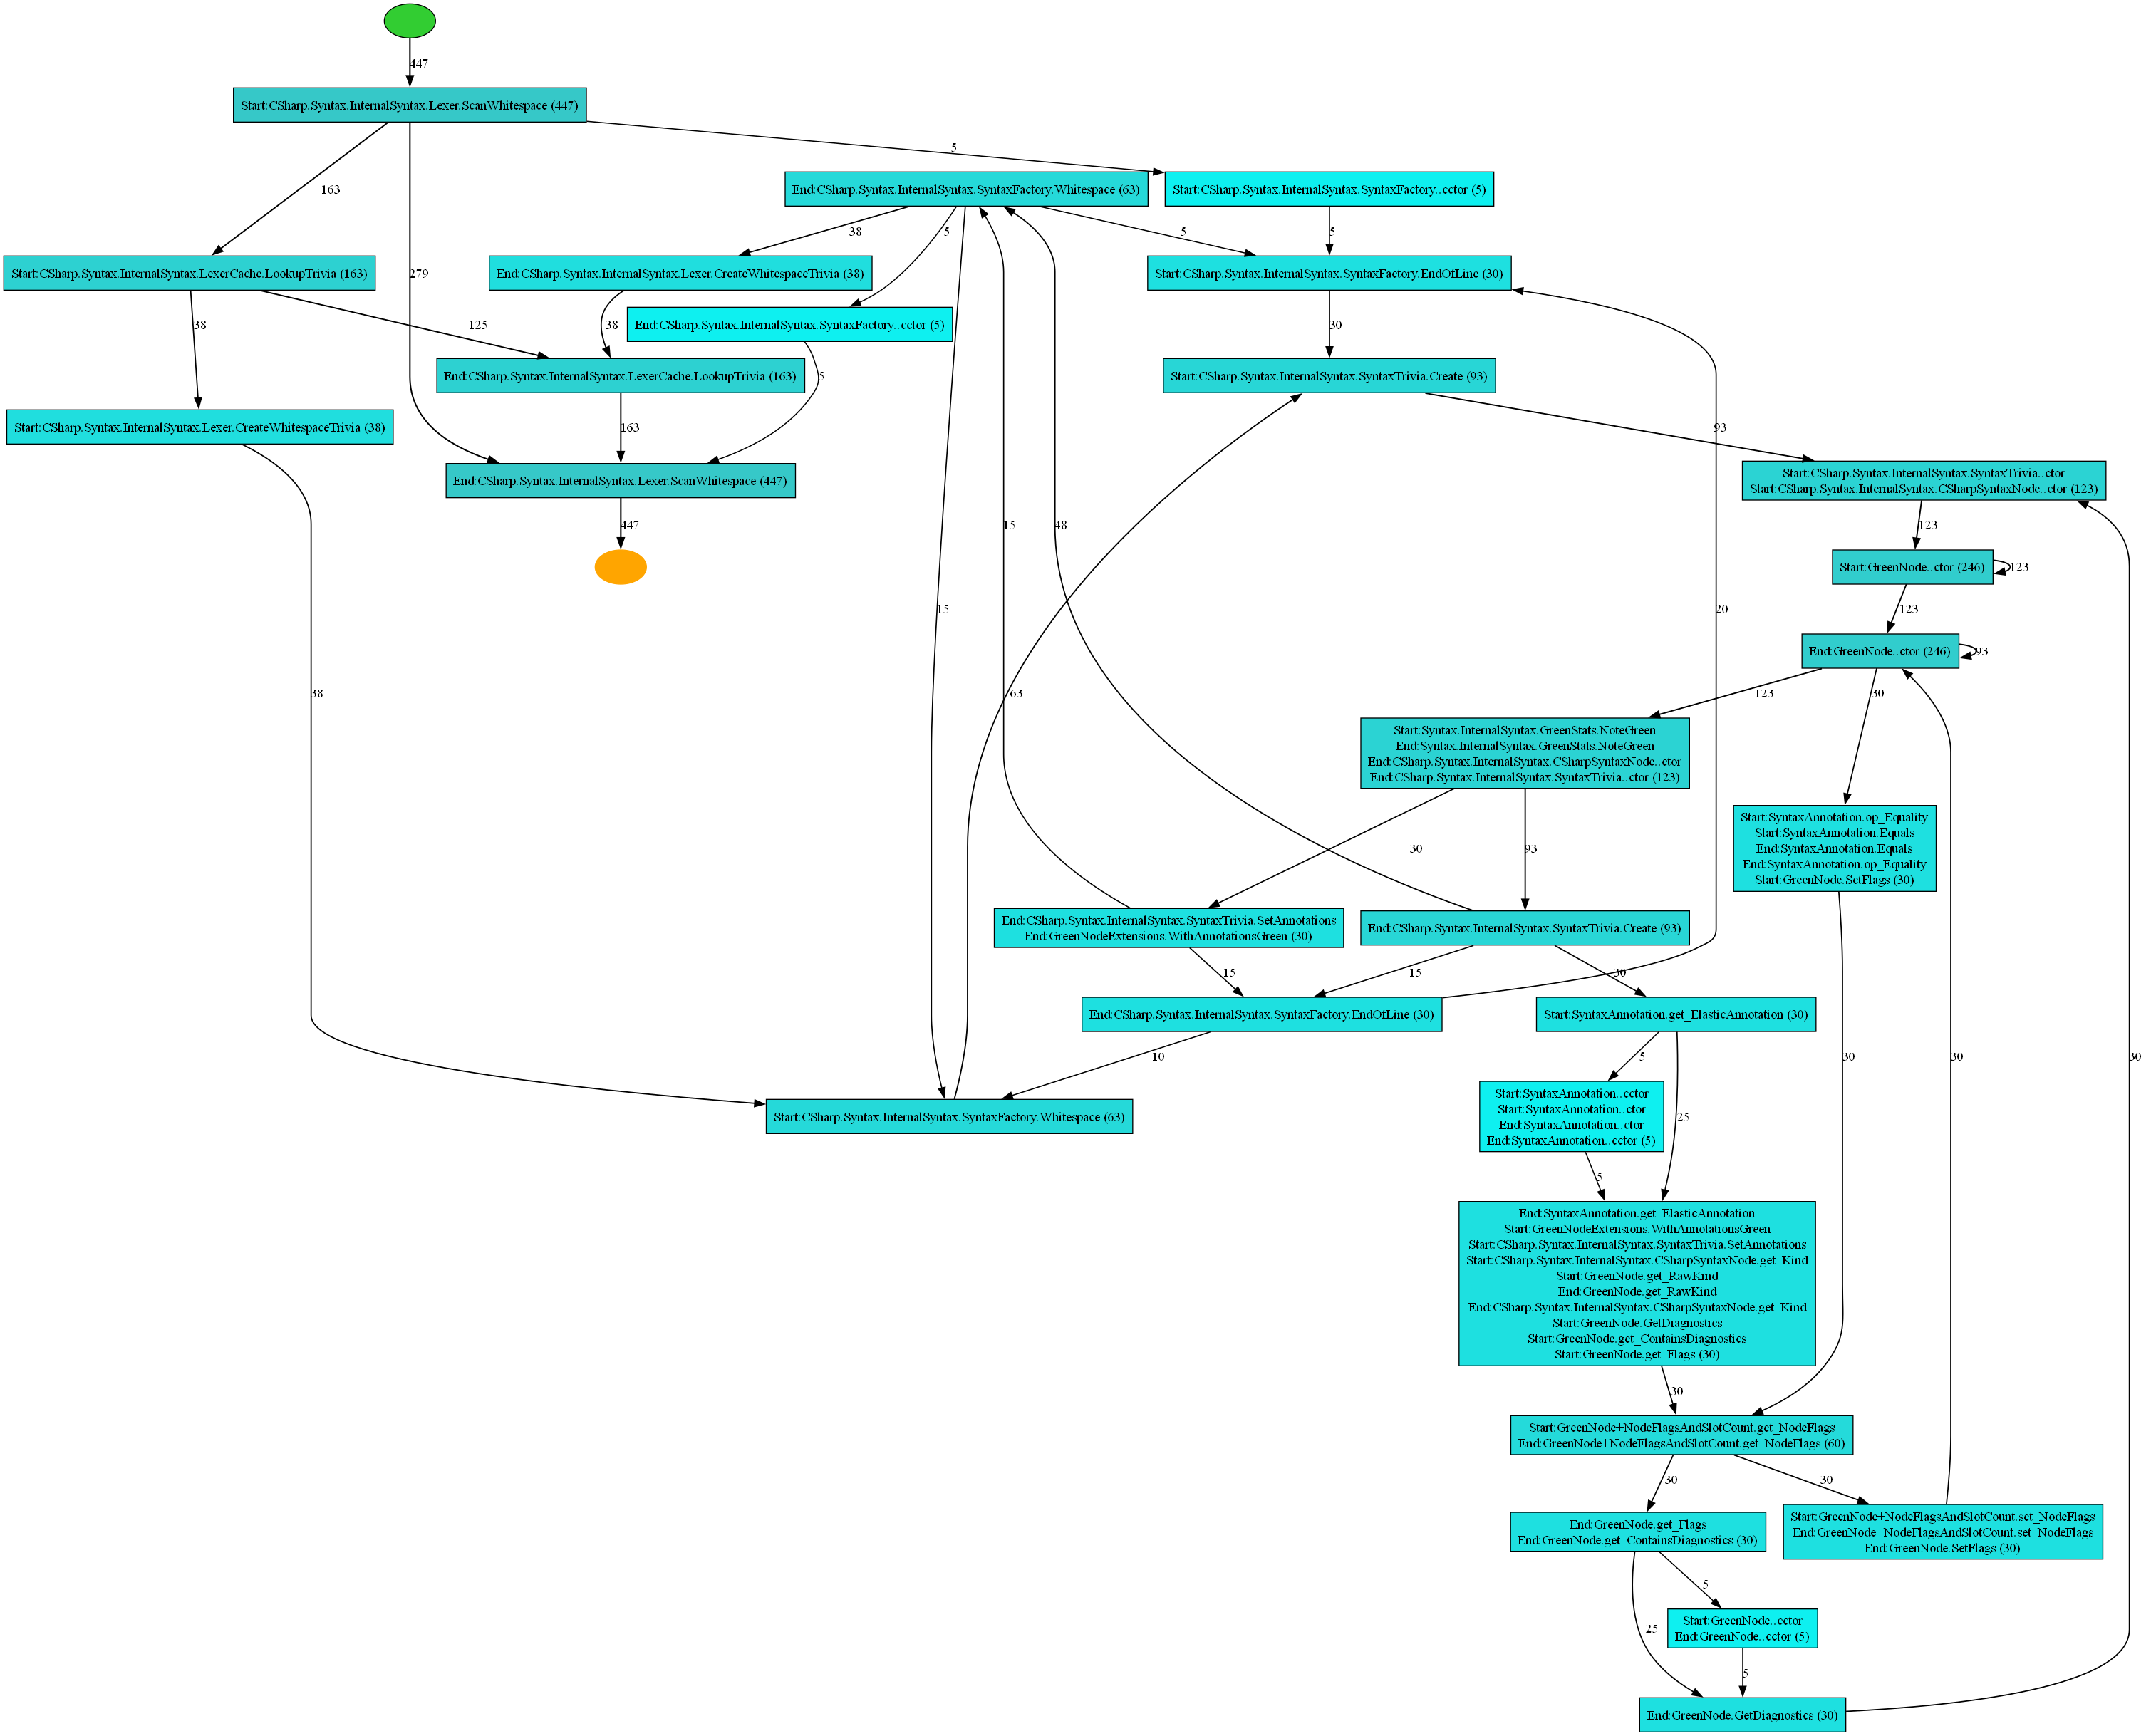

In [137]:
to_remove = 'CSharp.Syntax.InternalSyntax.Lexer.ScanWhitespace'
lex_syntax_trivia_2 = remove_call_contents(lex_syntax_trivia_1, to_remove)
print(len(lex_syntax_trivia_2))
display_process(lex_syntax_trivia_1, to_remove)

In [138]:
lex_syntax_trivia_3 = remove_call_contents(lex_syntax_trivia_2, 'CSharp.SyntaxFacts.IsWhitespace')
lex_syntax_trivia_3 = remove_call_contents(lex_syntax_trivia_3, 'CSharp.SyntaxFacts.IsNewLine')
len(lex_syntax_trivia_3)

100%|██████████| 14950/14950 [00:00<00:00, 3314384.73it/s]


14531

In [139]:
lex_syntax_trivia_log = pandas.DataFrame(lex_syntax_trivia)
lex_syntax_trivia_log[lex_syntax_trivia_log["concept:name"].str.contains("Lexer.IsConflictMarkerTrivia")]["original:concept:name"].value_counts()

original:concept:name
7     14
8     12
1     10
9      8
3      6
2      4
10     4
0      2
4      2
5      2
6      2
Name: count, dtype: int64

In [140]:
to_remove = 'CSharp.Syntax.InternalSyntax.Lexer.IsConflictMarkerTrivia'
lex_syntax_trivia_4 = remove_call_contents(lex_syntax_trivia_3, to_remove)
print(len(lex_syntax_trivia_4))
display_process(lex_syntax_trivia_3, to_remove)

100%|██████████| 14531/14531 [00:00<00:00, 3214018.43it/s]


14399


100%|██████████| 14531/14531 [00:00<00:00, 2634083.82it/s]


(165, 9)

case:concept:name
0     5
17    5
31    5
30    5
29    5
28    5
27    5
26    5
25    5
24    5
23    5
22    5
21    5
20    5
19    5
18    5
16    5
1     5
15    5
14    5
13    5
12    5
11    5
10    5
9     5
8     5
7     5
6     5
5     5
4     5
3     5
2     5
32    5
Name: count, dtype: int64

concept:name
Start:CSharp.Syntax.InternalSyntax.Lexer.IsConflictMarkerTrivia    33
Start:Text.StringText.get_Item                                     33
End:Text.StringText.get_Item                                       33
Call:CSharp.SyntaxFacts.IsNewLine                                  33
End:CSharp.Syntax.InternalSyntax.Lexer.IsConflictMarkerTrivia      33
Name: count, dtype: int64

 94%|█████████▍| 31/33 [00:00<00:00, 12325.66it/s]


In [141]:
lex_syntax_trivia_log = pandas.DataFrame(lex_syntax_trivia)
lex_syntax_trivia_log[lex_syntax_trivia_log["concept:name"].str.contains("g__lexSingleLineComment")]["original:concept:name"].value_counts()

original:concept:name
3     2
4     2
7     2
9     2
10    2
Name: count, dtype: int64

100%|██████████| 14399/14399 [00:00<00:00, 3194086.28it/s]


13879


100%|██████████| 14399/14399 [00:00<00:00, 3174610.14it/s]


(525, 9)

case:concept:name
0    133
1     98
2     98
3     98
4     98
Name: count, dtype: int64

concept:name
Call:CSharp.SyntaxFacts.IsNewLine                                                         355
Start:GreenNode..ctor                                                                      10
End:GreenNode..ctor                                                                        10
Start:Syntax.InternalSyntax.SyntaxListBuilder.get_Count                                    10
End:Syntax.InternalSyntax.SyntaxListBuilder.get_Count                                      10
Start:GreenNode.get_RawKind                                                                 5
End:GreenNode.get_RawKind                                                                   5
End:GreenNode.get_IsList                                                                    5
Start:Syntax.InternalSyntax.SyntaxListBuilder.EnsureAdditionalCapacity                      5
Start:CSharp.Syntax.InternalSyntax.Lexer.<LexSyntaxTrivia>g__lexSingleLineComment|65_0      5
Start:Syntax.InternalSyntax.SyntaxListBuilder.A

100%|█████████▉| 408/410 [00:00<00:00, 162283.17it/s]


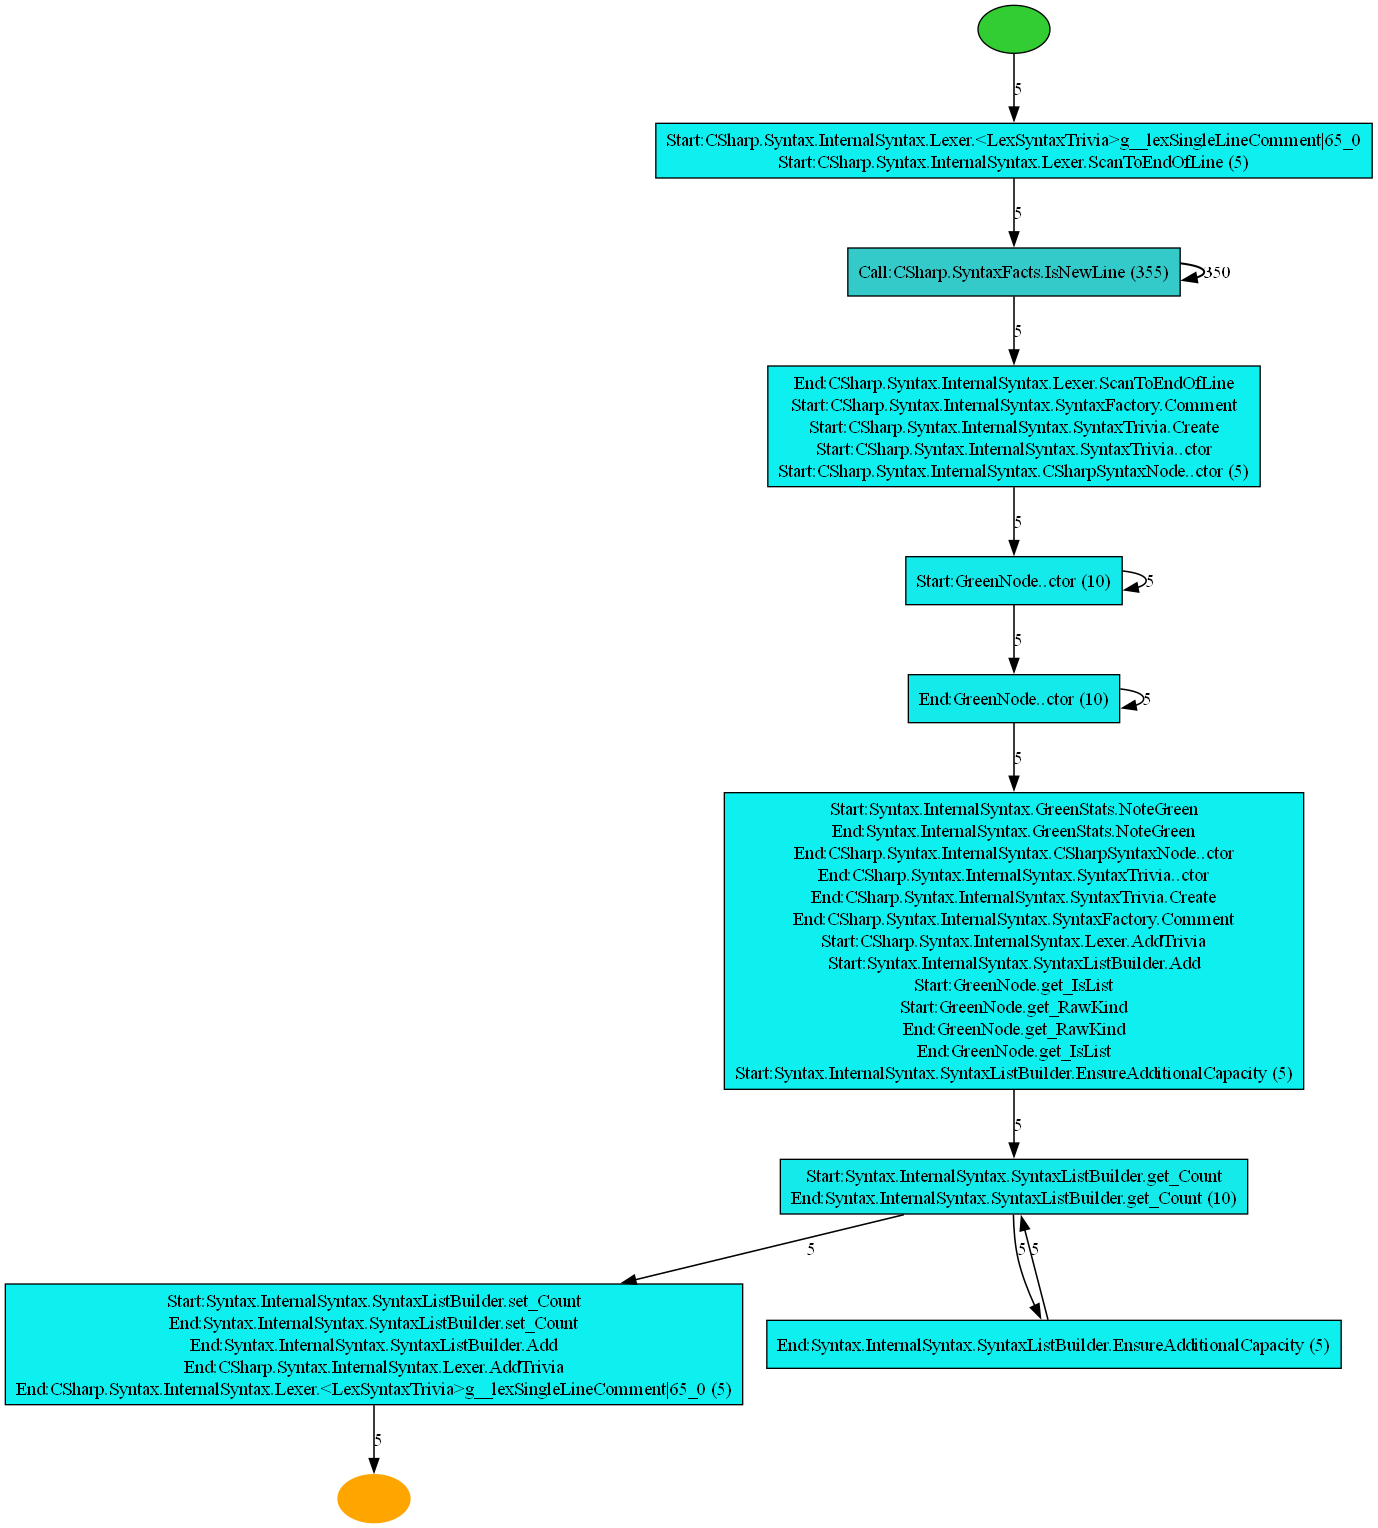

In [142]:
to_remove = 'CSharp.Syntax.InternalSyntax.Lexer.<LexSyntaxTrivia>g__lexSingleLineComment|65_0'
lex_syntax_trivia_5 = remove_call_contents(lex_syntax_trivia_4, to_remove)
print(len(lex_syntax_trivia_5))
display_process(lex_syntax_trivia_4, to_remove)

In [143]:
lex_syntax_trivia_log = pandas.DataFrame(lex_syntax_trivia)
lex_syntax_trivia_log[lex_syntax_trivia_log["concept:name"].str.endswith("LexSyntaxTrivia")]["original:concept:name"].value_counts()

original:concept:name
3     728
7     372
8     284
2     248
6     248
5     232
9     228
1     220
4     220
10    196
0     192
Name: count, dtype: int64

100%|█████████▉| 6973/6975 [00:00<00:00, 63390.97it/s]


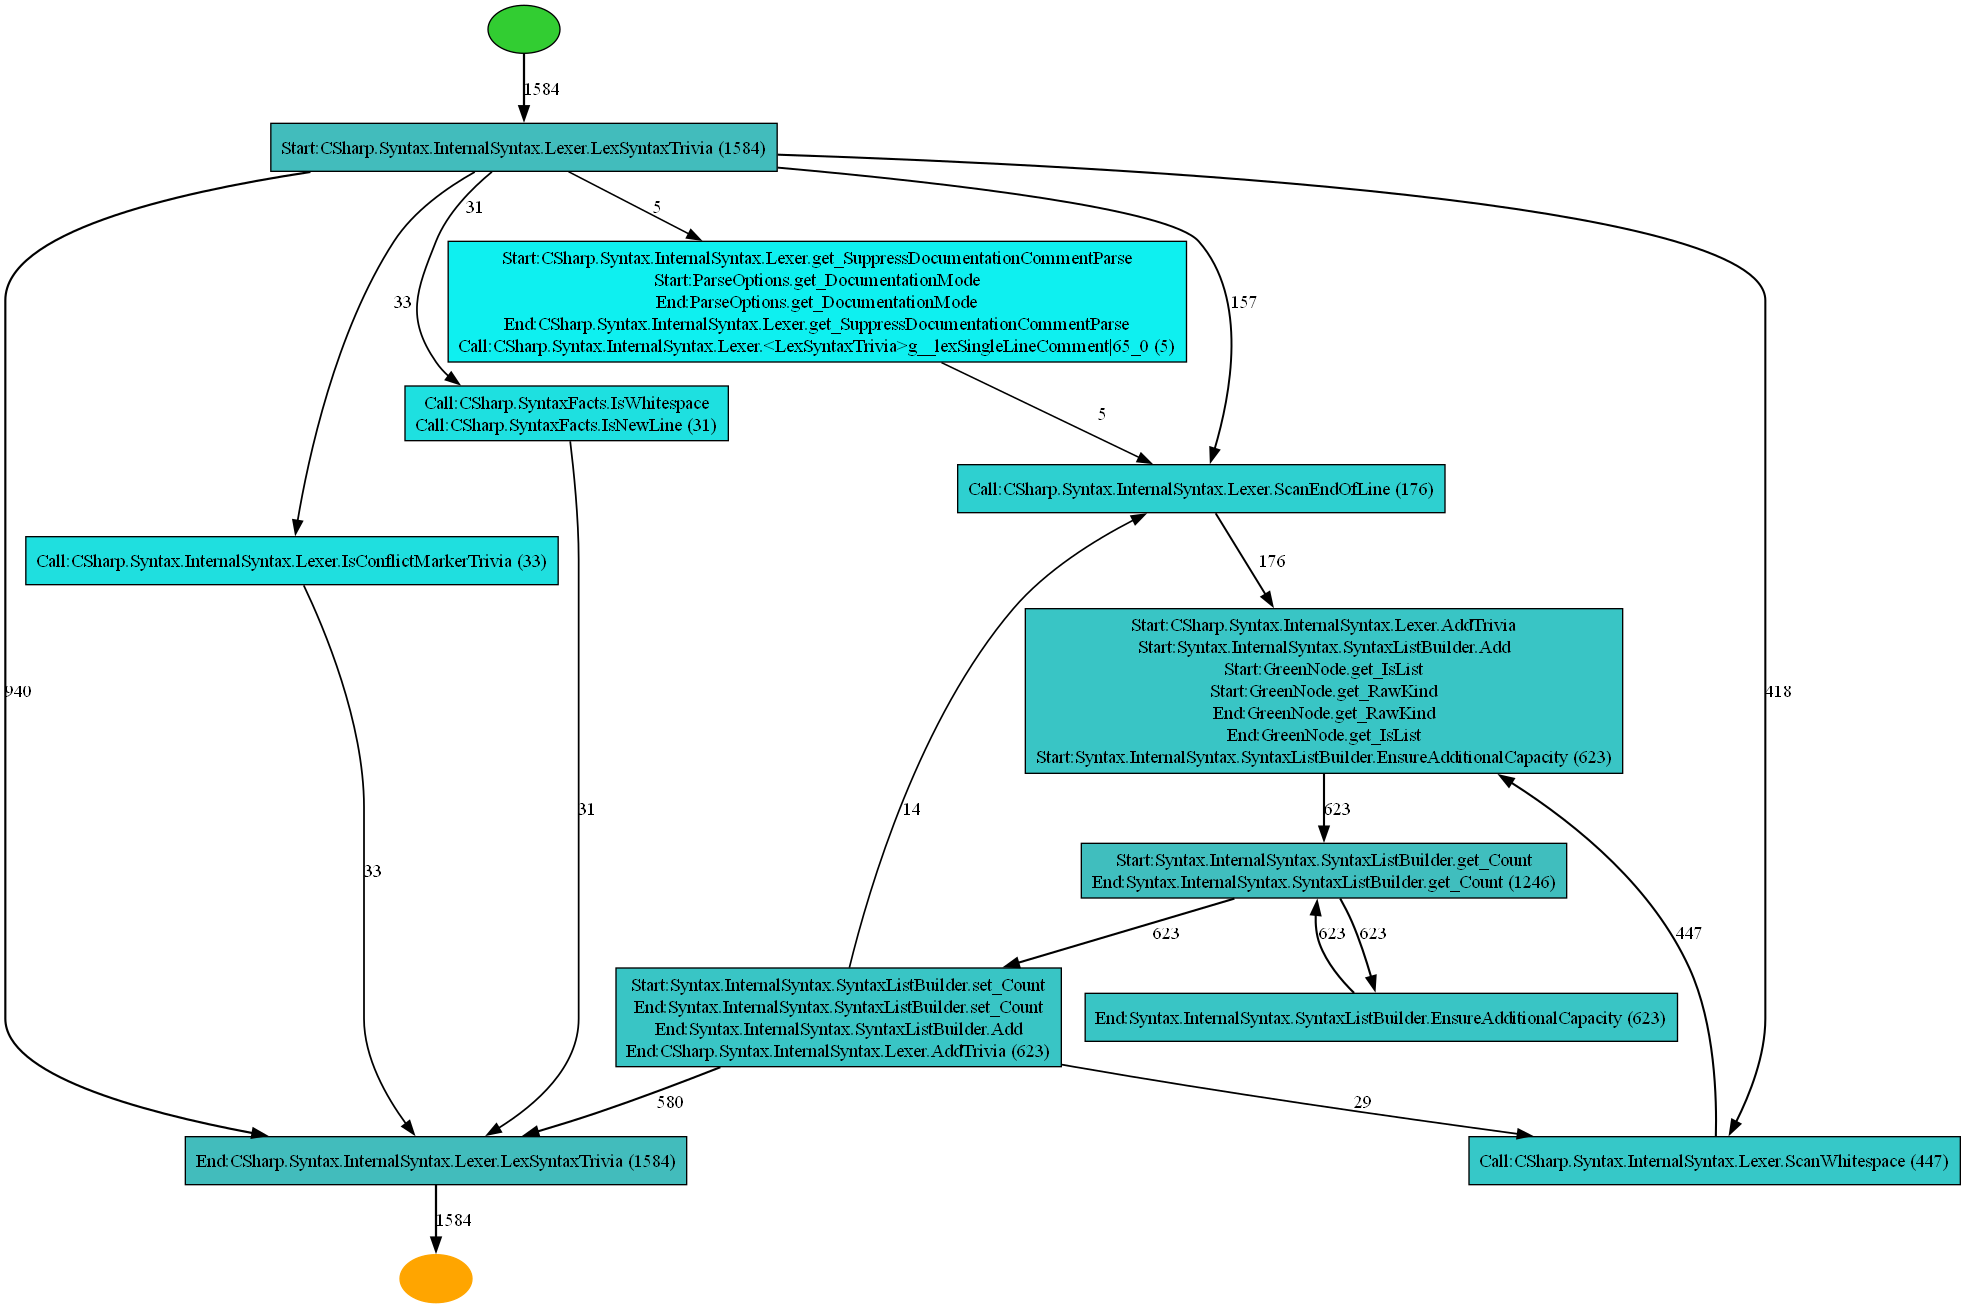

In [144]:
pm4py.view_heuristics_net(pm4py.discover_heuristics_net(merge_paired_events(pandas.DataFrame(lex_syntax_trivia_5))))

In [145]:
to_remove = 'CSharp.Syntax.InternalSyntax.Lexer.LexSyntaxTrivia'
log_list_2 = remove_call_contents(log_list, to_remove)
len(log_list_2)

100%|██████████| 1148660/1148660 [00:00<00:00, 3763996.72it/s]


1129416

### SyntaxToken Create

100%|██████████| 1129416/1129416 [00:01<00:00, 699640.61it/s]


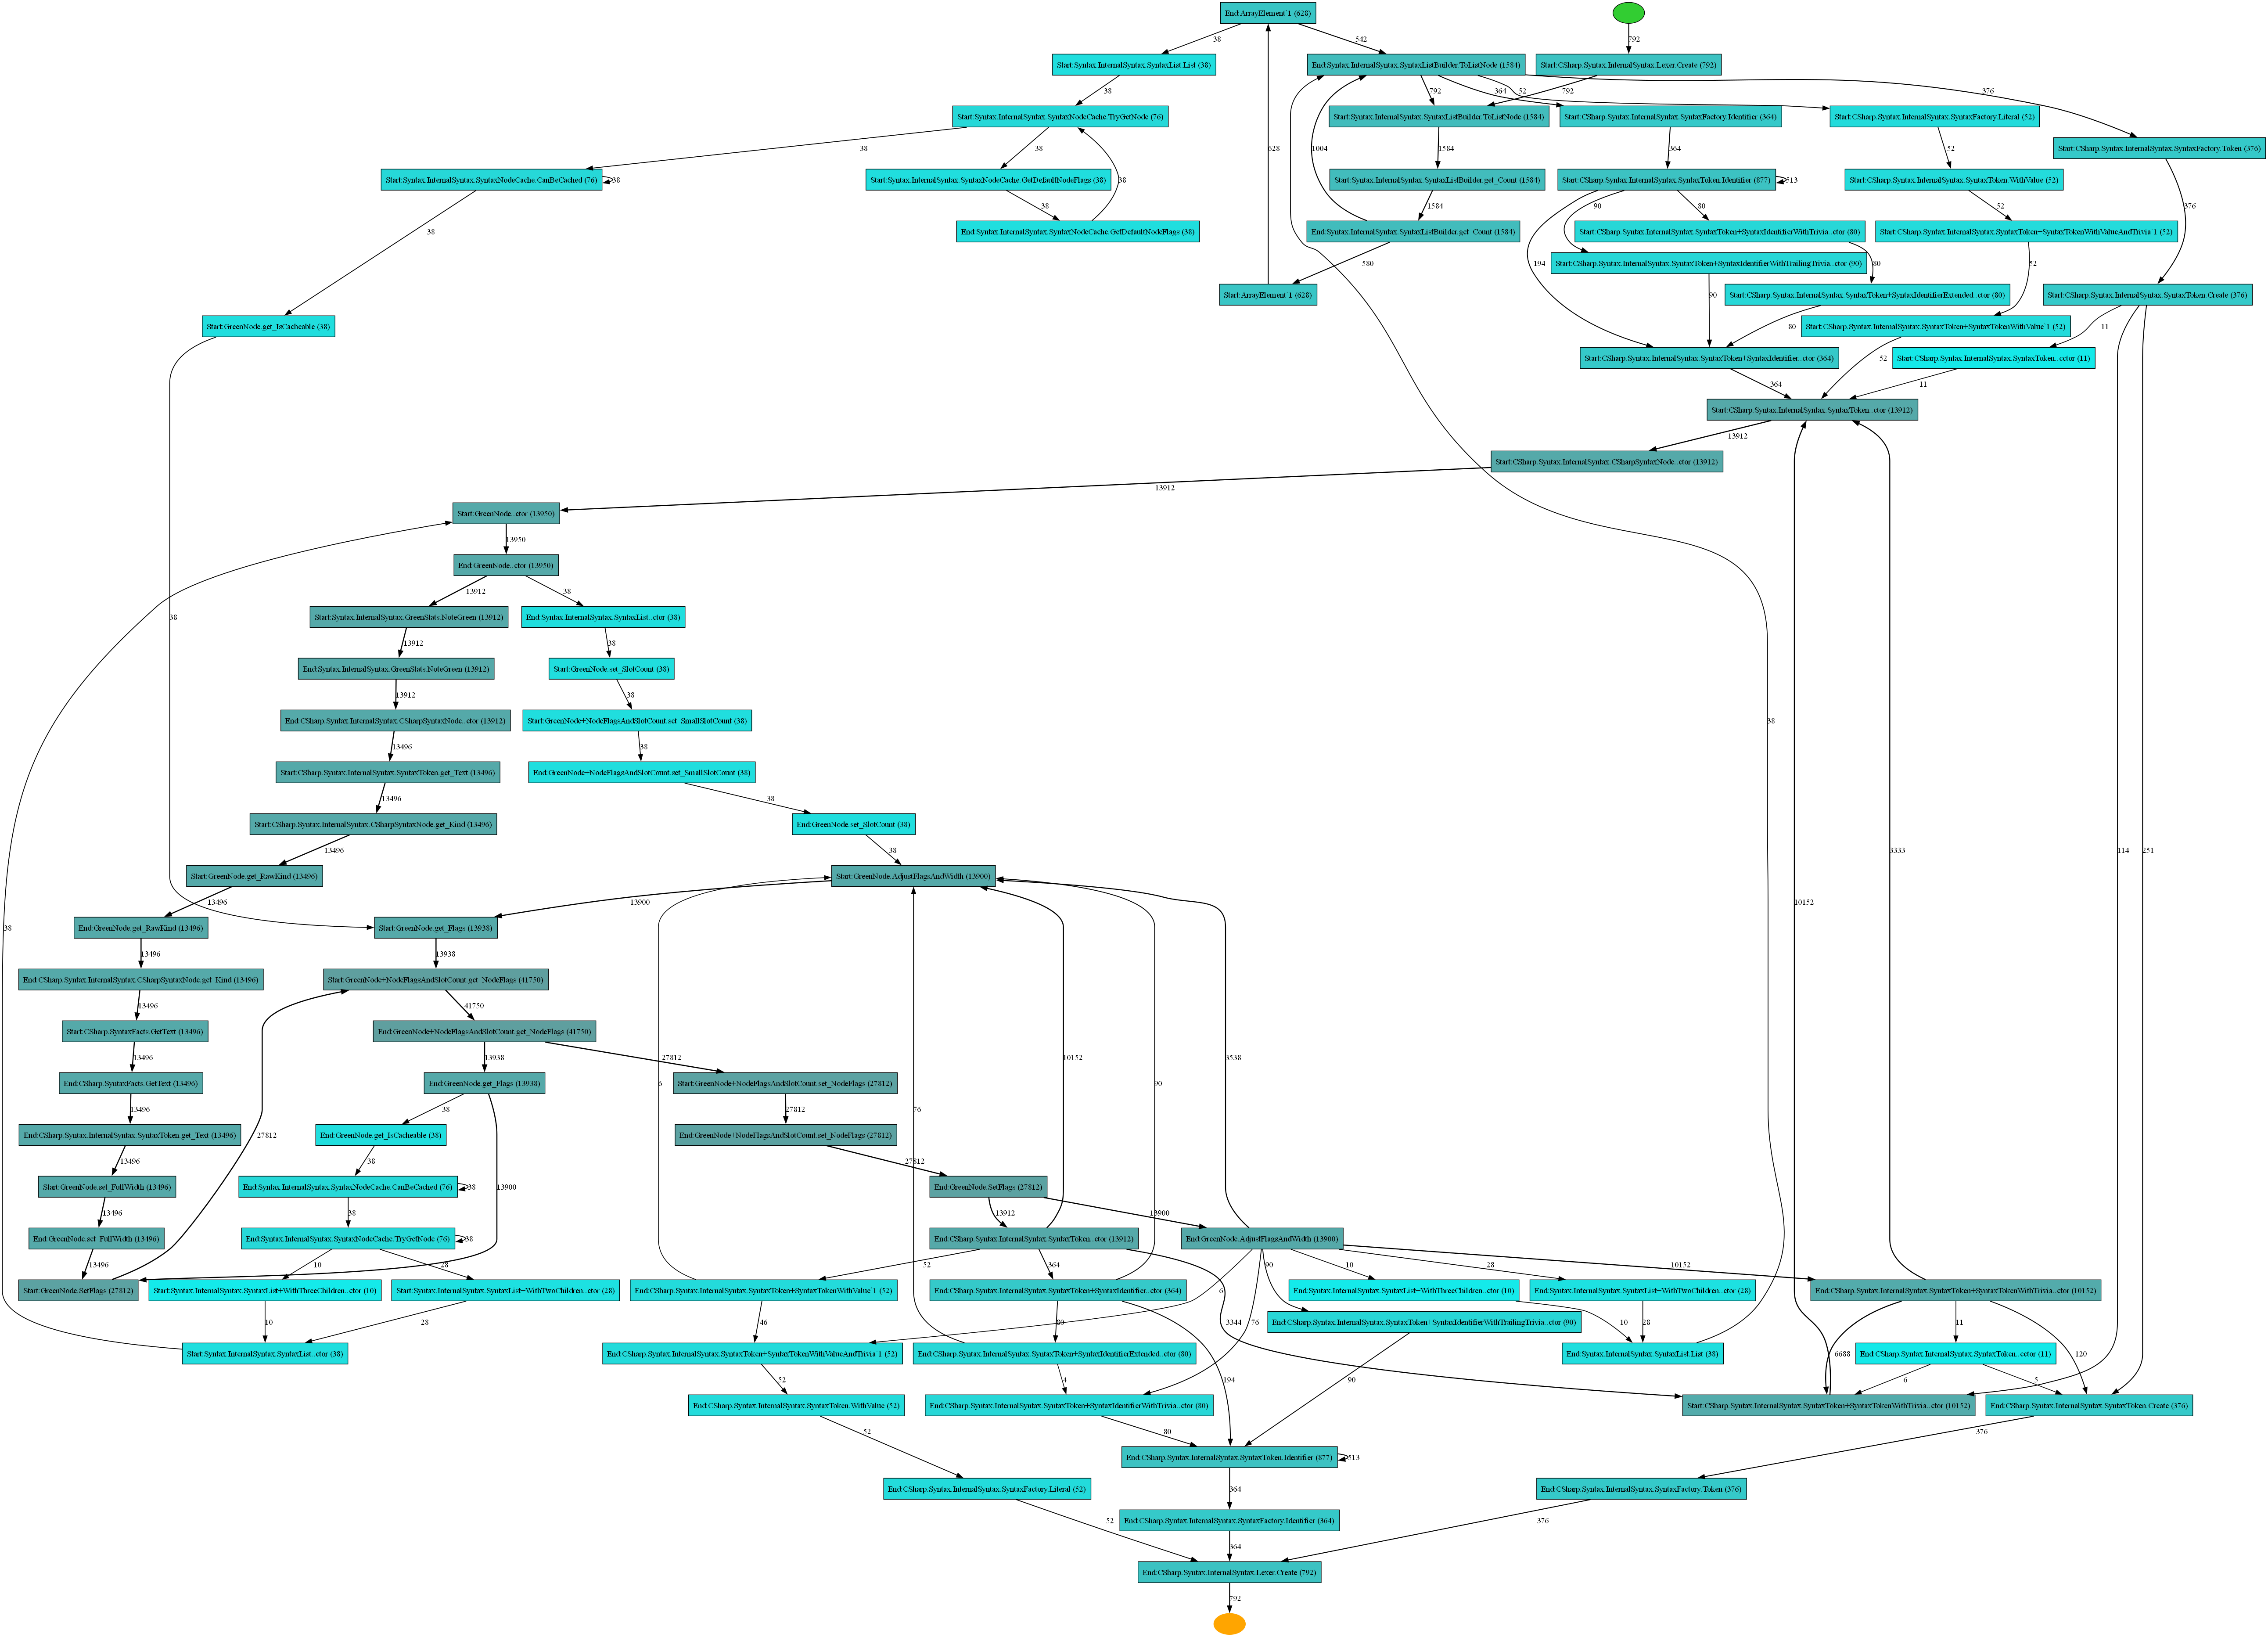

In [147]:
syntax_token_create = extract_call_contents(log_list_2, 'CSharp.Syntax.InternalSyntax.Lexer.Create')
pm4py.view_heuristics_net(pm4py.discover_heuristics_net(pandas.DataFrame(syntax_token_create)))

In [151]:
a = pandas.DataFrame(syntax_token_create)
a[a["concept:name"].str.contains("CSharp.Syntax.InternalSyntax.SyntaxFactory")]["concept:name"].value_counts()

concept:name
Start:CSharp.Syntax.InternalSyntax.SyntaxFactory.Token         376
End:CSharp.Syntax.InternalSyntax.SyntaxFactory.Token           376
Start:CSharp.Syntax.InternalSyntax.SyntaxFactory.Identifier    364
End:CSharp.Syntax.InternalSyntax.SyntaxFactory.Identifier      364
Start:CSharp.Syntax.InternalSyntax.SyntaxFactory.Literal        52
End:CSharp.Syntax.InternalSyntax.SyntaxFactory.Literal          52
Name: count, dtype: int64

In [156]:
syntax_token_create_2 = remove_call_contents(syntax_token_create, 'CSharp.Syntax.InternalSyntax.SyntaxFactory.Token')
syntax_token_create_2 = remove_call_contents(syntax_token_create_2, 'CSharp.Syntax.InternalSyntax.SyntaxFactory.Literal')
syntax_token_create_2 = remove_call_contents(syntax_token_create_2, 'CSharp.Syntax.InternalSyntax.SyntaxFactory.Identifier')
syntax_token_create_2 = remove_call_contents(syntax_token_create_2, 'Syntax.InternalSyntax.SyntaxListBuilder.ToListNode')

100%|██████████| 12064/12064 [00:00<00:00, 2380396.27it/s]


100%|█████████▉| 3958/3960 [00:00<00:00, 438740.29it/s]


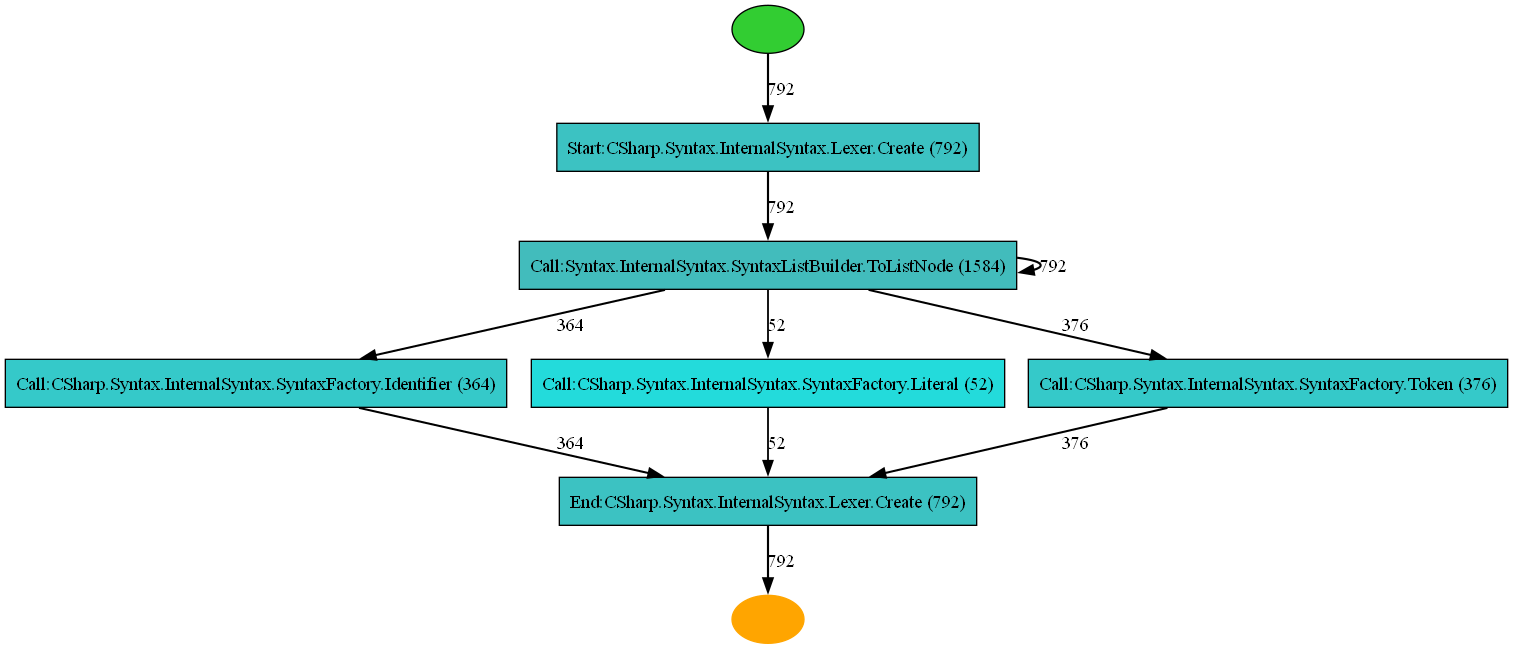

In [157]:
pm4py.view_heuristics_net(pm4py.discover_heuristics_net(merge_paired_events(pandas.DataFrame(syntax_token_create_2))))

100%|██████████| 532724/532724 [00:00<00:00, 3579488.81it/s]


521930


100%|██████████| 532724/532724 [00:00<00:00, 3549364.21it/s]


(11158, 9)

case:concept:name
37     50
342    50
11     50
363    48
271    48
       ..
170    24
171    24
173    24
175    24
182    24
Name: count, Length: 364, dtype: int64

concept:name
End:CSharp.Syntax.InternalSyntax.SyntaxToken.Identifier                                    877
Start:CSharp.Syntax.InternalSyntax.SyntaxToken.Identifier                                  877
Start:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags                                        756
End:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags                                          756
End:GreenNode.SetFlags                                                                     560
End:GreenNode+NodeFlagsAndSlotCount.set_NodeFlags                                          560
Start:GreenNode+NodeFlagsAndSlotCount.set_NodeFlags                                        560
Start:GreenNode.SetFlags                                                                   560
End:CSharp.Syntax.InternalSyntax.SyntaxFactory.Identifier                                  364
End:CSharp.Syntax.InternalSyntax.SyntaxToken+SyntaxIdentifier..ctor                        364
End:CSharp.Syntax.InternalSyntax.Synt

100%|█████████▉| 6092/6094 [00:00<00:00, 84963.04it/s]


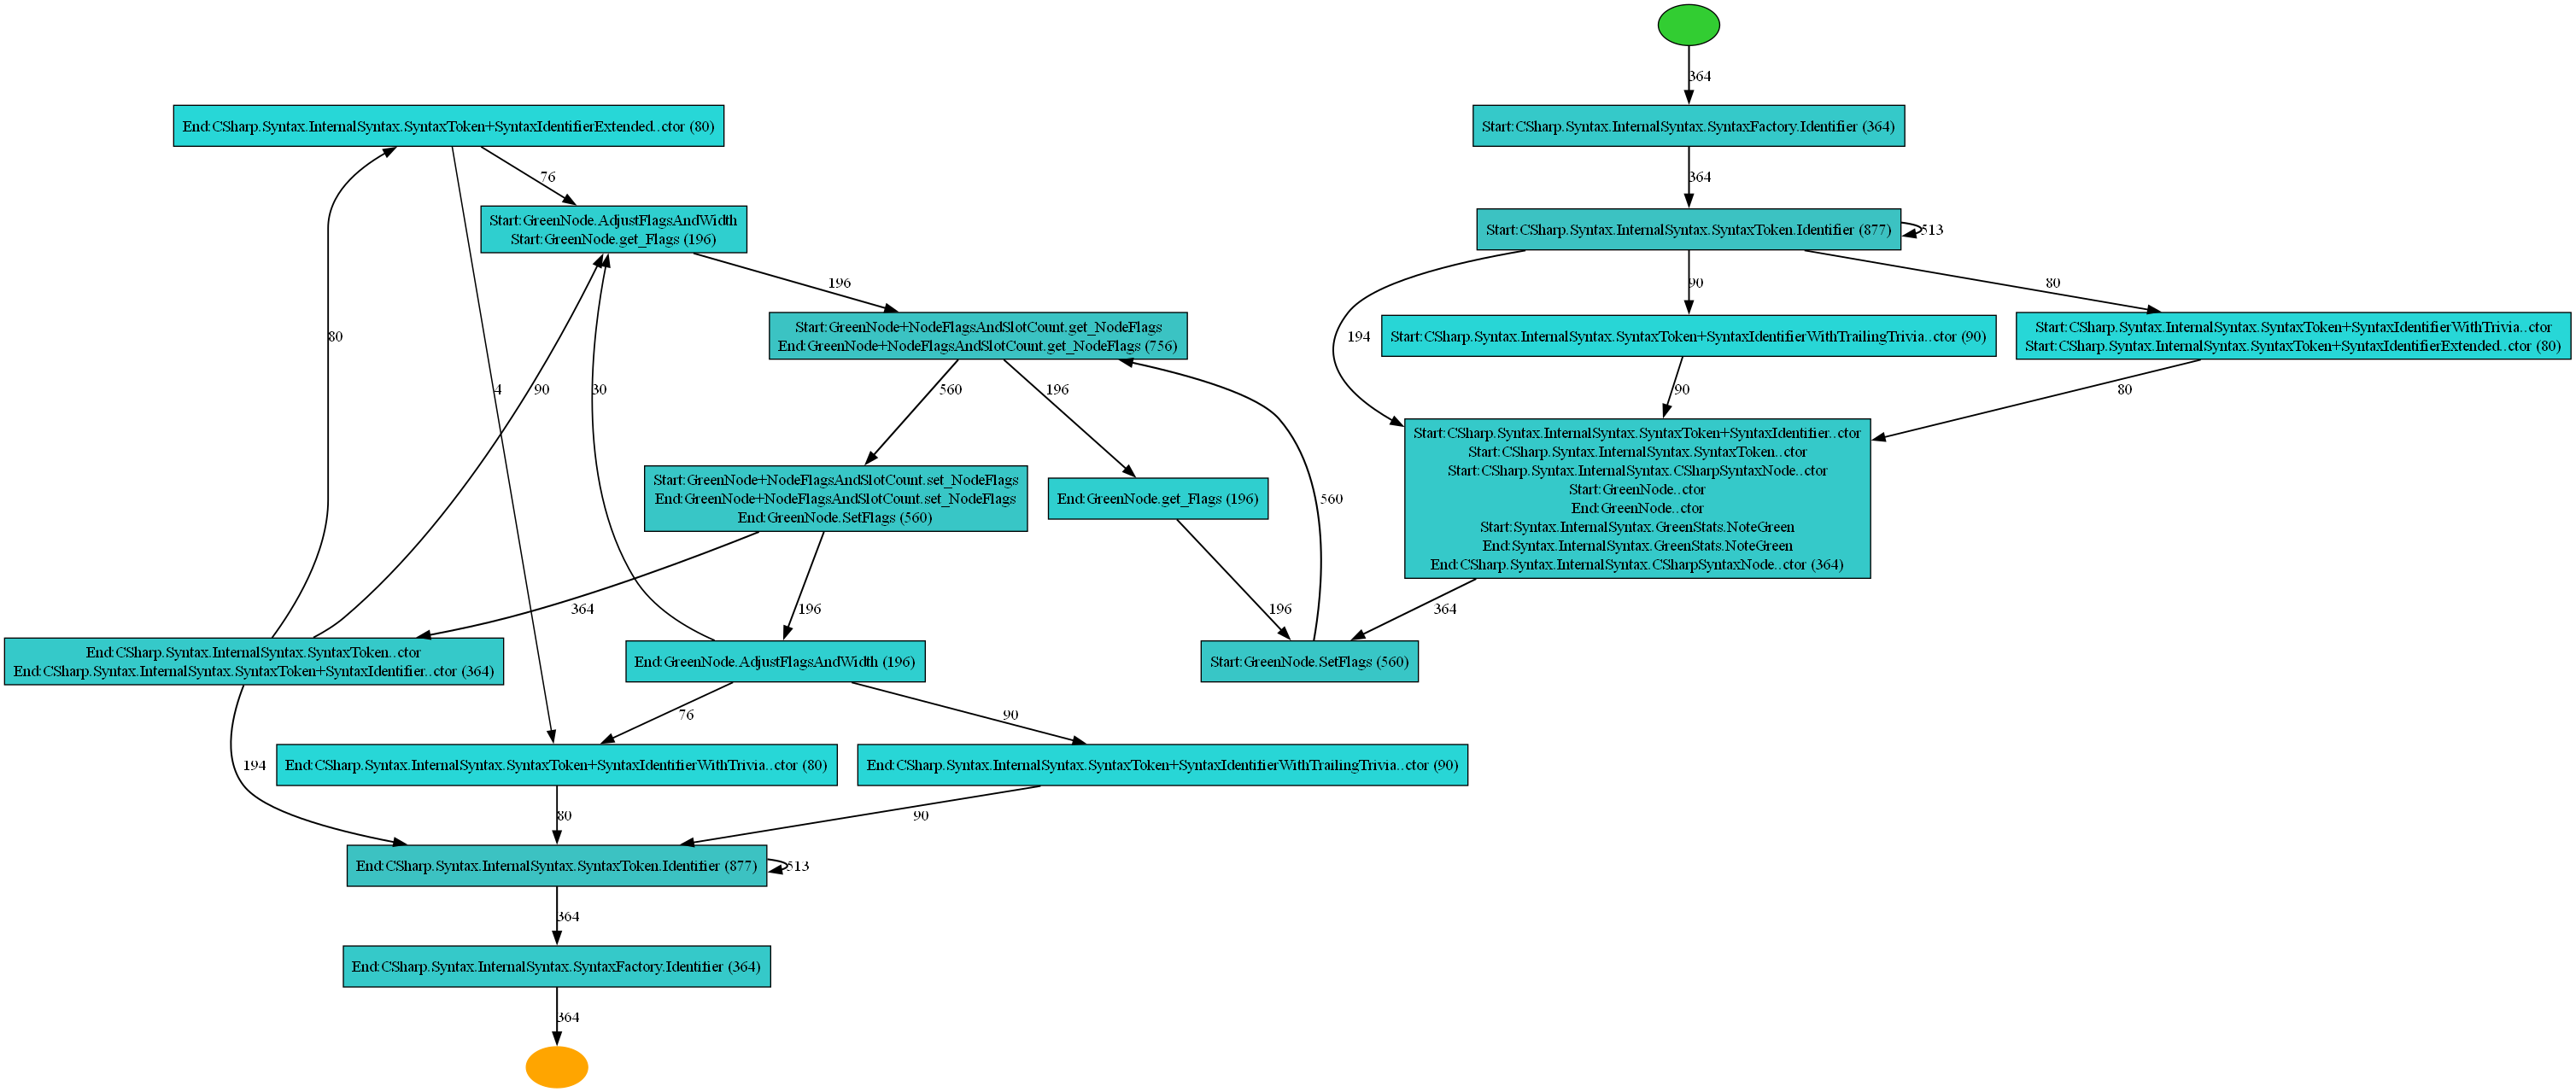

In [ ]:
to_remove = 'CSharp.Syntax.InternalSyntax.SyntaxFactory.Token'
syntax_token_create_2 = remove_call_contents(syntax_token_create, to_remove)
print(len(syntax_token_create_2))
display_process(syntax_token_create, to_remove)

In [160]:
to_remove = 'CSharp.Syntax.InternalSyntax.Lexer.LexSyntaxToken'
log_list_3 = remove_call_contents(log_list_2, to_remove)
len(log_list_3)

100%|██████████| 1129416/1129416 [00:00<00:00, 4178812.20it/s]


570390

In [164]:
to_remove = 'CSharp.Syntax.InternalSyntax.Lexer.QuickScanSyntaxToken'
log_list_4 = remove_call_contents(log_list_3, to_remove)

100%|██████████| 570390/570390 [00:00<00:00, 3498043.72it/s]


### Lex

100%|██████████| 539101/539101 [00:00<00:00, 4404624.21it/s]


5515


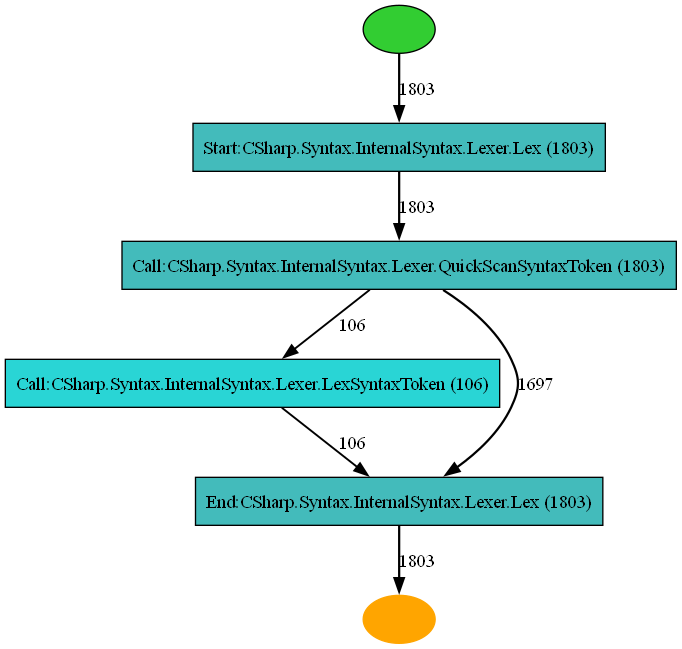

In [167]:
lex_log = extract_call_contents(log_list_4, 'CSharp.Syntax.InternalSyntax.Lexer.Lex')
print(len(lex_log))
pm4py.view_heuristics_net(pm4py.discover_heuristics_net(pandas.DataFrame(lex_log)))

In [262]:
to_remove = 'CSharp.Syntax.InternalSyntax.Lexer.Lex'
log_list_5 = remove_call_contents(log_list_4, to_remove)

100%|██████████| 539101/539101 [00:00<00:00, 3623591.14it/s]


In [263]:
find_first_deviation(log_list_5)

100%|██████████| 535389/535389 [00:00<00:00, 4872944.13it/s]

Deviation: {'Call:CSharp.Syntax.InternalSyntax.Lexer.Lex': 10, 'End:CSharp.Syntax.InternalSyntax.SyntaxParser.PreLex': 1}


{'text': ['Call:CSharp.Syntax.InternalSyntax.Lexer.Lex',
  'Call:CSharp.Syntax.InternalSyntax.Lexer.Lex',
  'Call:CSharp.Syntax.InternalSyntax.Lexer.Lex',
  'Call:CSharp.Syntax.InternalSyntax.Lexer.Lex',
  'Call:CSharp.Syntax.InternalSyntax.Lexer.Lex',
  'Call:CSharp.Syntax.InternalSyntax.Lexer.Lex',
  'Call:CSharp.Syntax.InternalSyntax.Lexer.Lex',
  'Call:CSharp.Syntax.InternalSyntax.Lexer.Lex',
  'Call:CSharp.Syntax.InternalSyntax.Lexer.Lex',
  'Call:CSharp.Syntax.InternalSyntax.Lexer.Lex',
  'End:CSharp.Syntax.InternalSyntax.SyntaxParser.PreLex'],
 'traceids': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
 'open_events': ['Start:CSharp.CSharpCompiler.ParseFile',
  'Start:CSharp.CSharpCompiler.ParseFile',
  'Start:CSharp.SyntaxFactory.ParseSyntaxTree',
  'Start:CSharp.CSharpSyntaxTree.ParseText',
  'Start:CSharp.CSharpSyntaxTree.ParseText',
  'Start:CSharp.CSharpSyntaxTree.ParseText',
  'Start:CSharp.Syntax.InternalSyntax.LanguageParser..ctor',
  'Start:CSharp.Syntax.Inte

### PreLex

100%|██████████| 535389/535389 [00:00<00:00, 3750873.54it/s]


12665


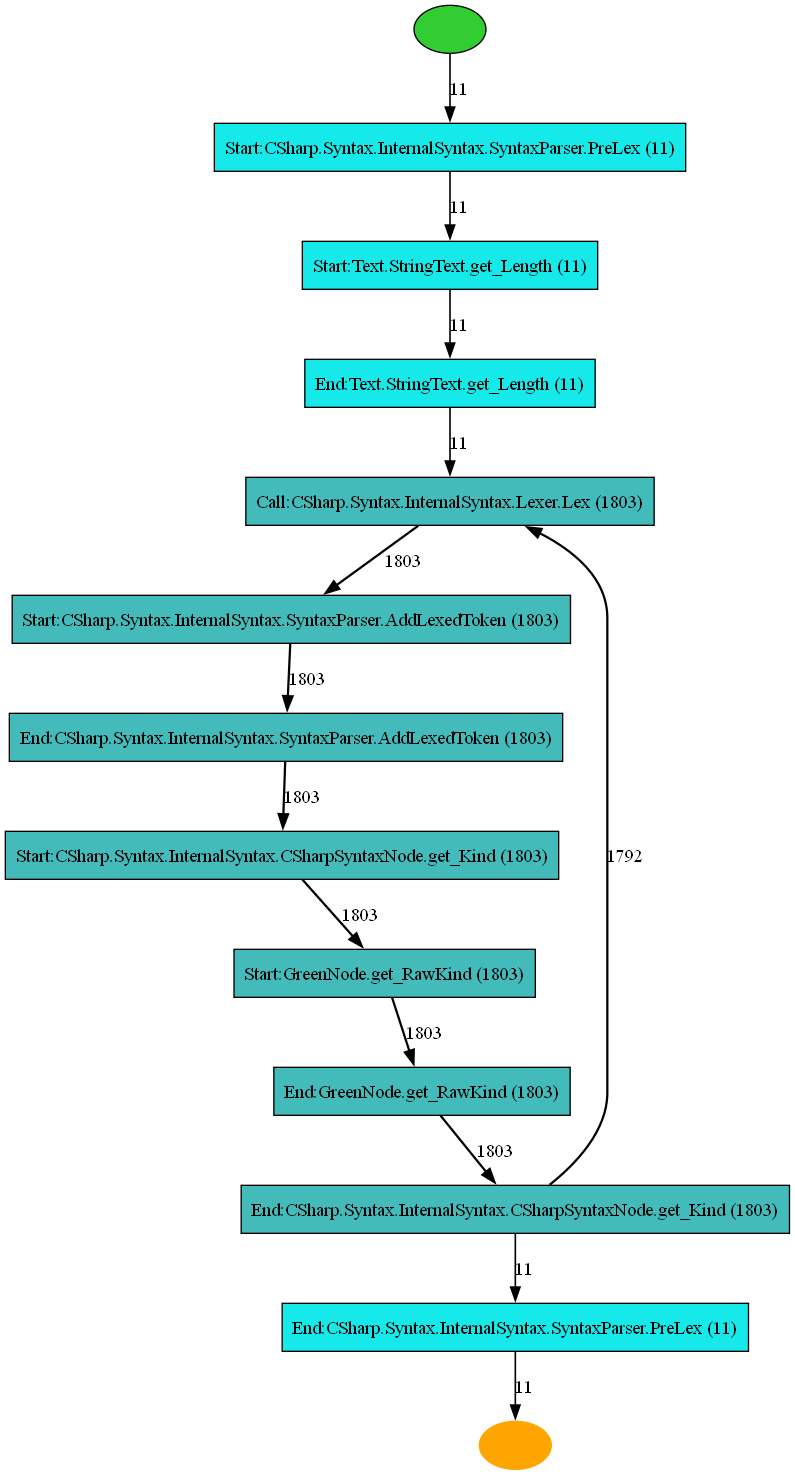

In [264]:
prelex_log = extract_call_contents(log_list_5, 'CSharp.Syntax.InternalSyntax.SyntaxParser.PreLex')
print(len(prelex_log))
pm4py.view_heuristics_net(pm4py.discover_heuristics_net(pandas.DataFrame(prelex_log)))

In [265]:
to_remove = 'CSharp.Syntax.InternalSyntax.SyntaxParser.PreLex'
log_list_6 = remove_call_contents(log_list_5, to_remove)
len(log_list_6)

100%|██████████| 535389/535389 [00:00<00:00, 3929838.22it/s]


522735

In [266]:
to_remove = 'CSharp.Syntax.InternalSyntax.LanguageParser.ParseNamespaceBody'
log_list_7 = remove_call_contents(log_list_6, to_remove)
len(log_list_7)

100%|██████████| 522735/522735 [00:00<00:00, 4466778.92it/s]


7784

### ParseFile

In [ ]:
to_remove = 'CommonCompiler.TryReadFileContent'
log_list_8 = remove_call_contents(log_list_7, to_remove)
len(log_list_8)

100%|██████████| 7784/7784 [00:00<00:00, 3884871.77it/s]


7135

In [297]:
to_remove = 'CSharp.CSharpSyntaxTree.GetMappedLineSpanAndVisibility'
log_list_10 = remove_call_contents(log_list_8, to_remove)
len(log_list_10)

100%|██████████| 7135/7135 [00:00<00:00, 2377183.18it/s]


3714

In [298]:
log_list_11 = remove_package(log_list_10, 'Syntax.InternalSyntax.SyntaxList')
log_list_11 = remove_package(log_list_11, 'Syntax.InternalSyntax.SyntaxList`1')
log_list_11 = remove_package(log_list_11, 'Syntax.InternalSyntax.SyntaxListBuilder')
log_list_11 = remove_package(log_list_11, 'Syntax.InternalSyntax.SyntaxListBuilder`1')
log_list_11 = remove_package(log_list_11, 'Syntax.InternalSyntax.SyntaxListPool')
len(log_list_11)

1/2: Start:Syntax.InternalSyntax.SyntaxList.List


100%|██████████| 3714/3714 [00:00<00:00, 3696640.97it/s]


2/2: Start:Syntax.InternalSyntax.SyntaxList..ctor


100%|██████████| 3658/3658 [00:00<00:00, 2432270.77it/s]


1/1: Start:Syntax.InternalSyntax.SyntaxList`1


100%|██████████| 3658/3658 [00:00<00:00, 3658265.15it/s]


1/6: Start:Syntax.InternalSyntax.SyntaxListBuilder..ctor


100%|██████████| 3306/3306 [00:00<00:00, 3285090.98it/s]


2/6: Start:Syntax.InternalSyntax.SyntaxListBuilder.ToList


100%|██████████| 3174/3174 [00:00<00:00, 1264386.07it/s]


3/6: Start:Syntax.InternalSyntax.SyntaxListBuilder.ToListNode


100%|██████████| 2880/2880 [00:00<00:00, 1913447.73it/s]


4/6: Start:Syntax.InternalSyntax.SyntaxListBuilder.get_Count


100%|██████████| 2880/2880 [00:00<00:00, 2879522.17it/s]


5/6: Start:Syntax.InternalSyntax.SyntaxListBuilder.Clear


100%|██████████| 2880/2880 [00:00<00:00, 2877464.39it/s]


6/6: Start:Syntax.InternalSyntax.SyntaxListBuilder.set_Count


100%|██████████| 2704/2704 [00:00<00:00, 2687535.07it/s]


1/1: Start:Syntax.InternalSyntax.SyntaxListBuilder`1


100%|██████████| 2704/2704 [00:00<00:00, 2710011.47it/s]


1/4: Start:Syntax.InternalSyntax.SyntaxListPool..ctor


100%|██████████| 2352/2352 [00:00<00:00, 1171754.72it/s]


2/4: Start:Syntax.InternalSyntax.SyntaxListPool.Allocate


100%|██████████| 2330/2330 [00:00<00:00, 1546317.77it/s]


3/4: Start:Syntax.InternalSyntax.SyntaxListPool.Free


100%|██████████| 2154/2154 [00:00<00:00, 2147499.60it/s]


4/4: Start:Syntax.InternalSyntax.SyntaxListPool.Grow


100%|██████████| 2060/2060 [00:00<?, ?it/s]


2060

100%|█████████▉| 508/510 [00:00<00:00, 72202.86it/s]


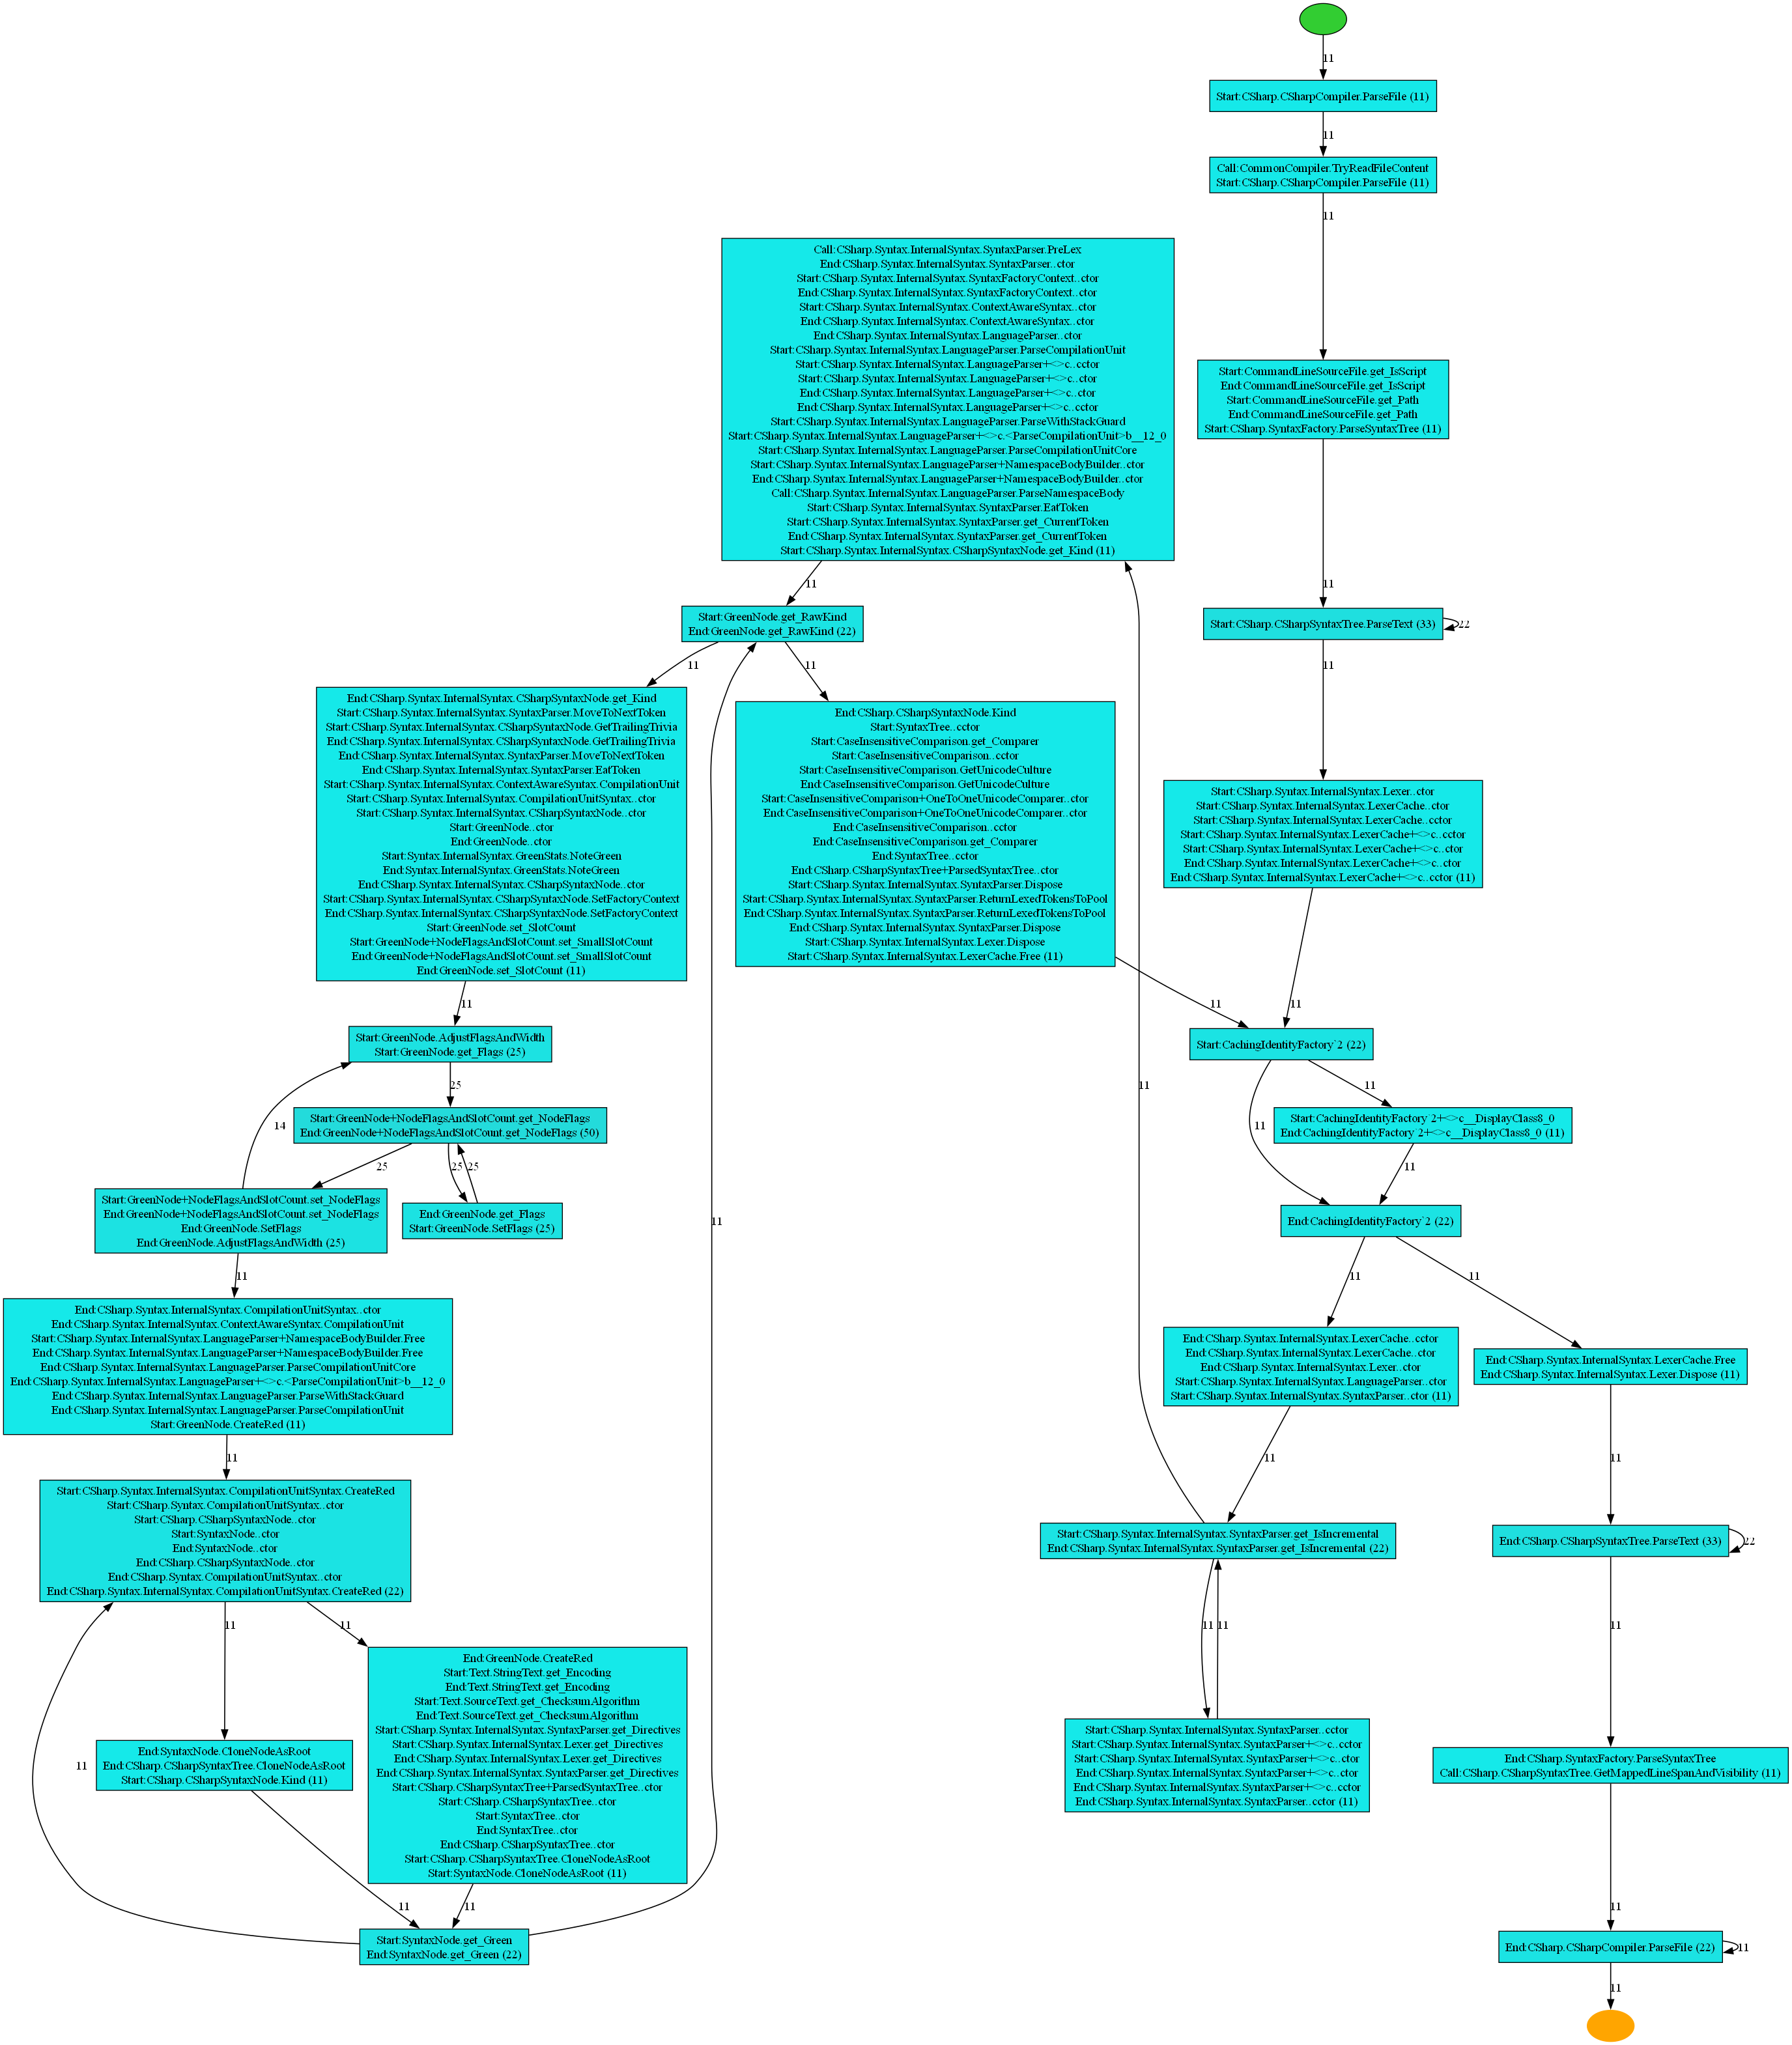

In [299]:
pm4py.view_heuristics_net(pm4py.discover_heuristics_net(merge_paired_events(pandas.DataFrame(log_list_11))))